<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [7]:
#imports

#import pmdarima as pm
#import seaborn as sns
import pandas as pd
import numpy as np
from numpy import log
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pystan
 

from prophet import Prophet

In [9]:
# model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
# model = pystan.StanModel(model_code=model_code)  # this will take a minute
# y = model.sampling(n_job,
#                    s=1).extract()['y']
# y.mean()  # should be close to 0


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5944b02c79788fa0db5b3a93728ca2bf NOW.
In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:837:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1940:
/Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:109:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/fun/csr_extract_u.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Sparse:26:
In file included from /Users/rachelsanderlin/Flat

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:344:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/arr.hpp:46:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/arr/functor/integrate_ode_rk45.hpp:17:
In file included from /Users/rachelsanderlin/

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:847:
env/lib/python3.9/site-packages/pystan/stan_fit.hpp:841:12: warning: 'auto_ptr<stan::io::var_context>' is deprecated [-Wdeprecated-declarations]
      std::auto_ptr<stan::io::var_context> init_context_ptr;
           ^
/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX.sdk/usr/include/c++/v1/__memory/auto_ptr.h:30:28: note: 'auto_ptr<stan::io::var_context>' has been explicitly marked deprecated here
class _LIBCPP_TEMPLATE_VIS _LIBCPP_DEPRECATED_IN_CXX11 auto_ptr
                           ^
/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX.sdk/usr/include/c++/v1/__config:825:41: note: expanded from macro '_LIBCPP_DEPRECATED_IN_CXX11'
#    define _LIBCPP_DEPRECATED_IN_CXX11 _LIBCPP_DEPRECATED
                                        ^
/Applica

      if(rs>0) A22.template selfadjointView<Lower>().rankUpdate(A21,typename NumTraits<RealScalar>::Literal(-1)); // bottleneck
                                                     ^
/Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Cholesky/LLT.h:397:61: note: in instantiation of function template specialization 'Eigen::internal::llt_inplace<double, 1>::blocked<Eigen::Matrix<double, -1, -1, 0>>' requested here
  { return llt_inplace<typename MatrixType::Scalar, Lower>::blocked(m)==-1; }
                                                            ^
/Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Cholesky/LLT.h:444:21: note: in instantiation of member function 'Eigen::internal::LLT_Traits<Eigen::Matrix<double, -1, -1, 0>, 1>::inplace_decomposition' requested here
  bool ok = Traits::inpla

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:344:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/arr.hpp:46:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/arr/functor/integrate_ode_rk45.hpp:17:
In file included from /Users/rachelsanderlin/

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

  Kernel kernel(dstEvaluator, srcEvaluator, func, dst.const_cast_derived());
         ^
/Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:879:5: note: in instantiation of function template specialization 'Eigen::internal::call_dense_assignment_loop<Eigen::Block<Eigen::Block<Eigen::Matrix<double, -1, -1, 0>, -1, -1, false>, -1, 1, true>, Eigen::CwiseBinaryOp<Eigen::internal::scalar_product_op<double>, const Eigen::CwiseNullaryOp<Eigen::internal::scalar_constant_op<double>, const Eigen::Matrix<double, -1, 1, 0>>, const Eigen::Map<Eigen::Matrix<double, -1, 1, 0>, 0>>, Eigen::internal::sub_assign_op<double, double>>' requested here
    call_dense_assignment_loop(dst, src, func);
    ^
/Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:836:46: note: 

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

190 warnings generated.
In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:837:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1940:
/Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated Num

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:109:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/fun/csr_extract_u.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Sparse:26:
In file included from /Users/rachelsanderlin/Flat

struct _LIBCPP_TEMPLATE_VIS _LIBCPP_DEPRECATED_IN_CXX11 unary_function
                            ^
/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX.sdk/usr/include/c++/v1/__config:825:41: note: expanded from macro '_LIBCPP_DEPRECATED_IN_CXX11'
#    define _LIBCPP_DEPRECATED_IN_CXX11 _LIBCPP_DEPRECATED
                                        ^
/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX.sdk/usr/include/c++/v1/__config:810:49: note: expanded from macro '_LIBCPP_DEPRECATED'
#      define _LIBCPP_DEPRECATED __attribute__((deprecated))
                                                ^
In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicti

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:847:
env/lib/python3.9/site-packages/pystan/stan_fit.hpp:841:12: warning: 'auto_ptr<stan::io::var_context>' is deprecated [-Wdeprecated-declarations]
      std::auto_ptr<stan::io::var_context> init_context_ptr;
           ^
/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX.sdk/usr/include/c++/v1/__memory/auto_ptr.h:30:28: note: 'auto_ptr<stan::io::var_context>' has been explicitly marked deprecated here
class _LIBCPP_TEMPLATE_VIS _LIBCPP_DEPRECATED_IN_CXX11 auto_ptr
                           ^
/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX.sdk/usr/include/c++/v1/__config:825:41: note: expanded from macro '_LIBCPP_DEPRECATED_IN_CXX11'
#    define _LIBCPP_DEPRECATED_IN_CXX11 _LIBCPP_DEPRECATED
                                        ^
/Applica

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:344:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/arr.hpp:46:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/arr/functor/integrate_ode_rk45.hpp:17:
In file included from /Users/rachelsanderlin/

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

In file included from /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/pystan_1mzp6pwm/stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9017739128651400604.cpp:846:
In file included from env/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/rachelsanderlin/Fl

189 warnings generated.


NameError: name 'n_job' is not defined

In [10]:
# bringing in our 4 dataframes
public_data = pd.read_csv(
    "COVID-19_Aggregate_Cases_Current_Weekly_County_Health.csv")
google_data_2020 = pd.read_csv(
    "2020_sub_region_1_daily_2020_US_Pennsylvania_daily_symptoms_dataset.csv",  dtype=str)
google_data_2021 = pd.read_csv(
    "2021_sub_region_1_daily_2021_US_Pennsylvania_daily_symptoms_dataset(1).csv", dtype=str)
google_data_2022 = pd.read_csv(
    "2022_sub_region_1_daily_2022_US_Pennsylvania_daily_symptoms_dataset(1).csv", dtype=str)

In [11]:
# consolidating our google data into one dataframe
google_dataframes = [google_data_2020, google_data_2021, google_data_2022]
google_data = pd.concat(google_dataframes)
google_data.head()

country_region_code country_region  sub_region_1 sub_region_1_code   
0                  US  United States  Pennsylvania             US-PA  \
1                  US  United States  Pennsylvania             US-PA   
2                  US  United States  Pennsylvania             US-PA   
3                  US  United States  Pennsylvania             US-PA   
4                  US  United States  Pennsylvania             US-PA   

  sub_region_2 sub_region_2_code                     place_id        date   
0          NaN               NaN  ChIJieUyHiaALYgRPbQiUEchRsI  2020-01-01  \
1          NaN               NaN  ChIJieUyHiaALYgRPbQiUEchRsI  2020-01-02   
2          NaN               NaN  ChIJieUyHiaALYgRPbQiUEchRsI  2020-01-03   
3          NaN               NaN  ChIJieUyHiaALYgRPbQiUEchRsI  2020-01-04   
4          NaN               NaN  ChIJieUyHiaALYgRPbQiUEchRsI  2020-01-05   

  symptom:Abdominal obesity symptom:Abdominal pain  ... symptom:Wart   
0                      2.37                   4.85  ...         1.22  \
1                      2.28                   4.74  ...         1.34   
2                      2.04                   4.62  ...         1.23   
3                      2.25                   4.83  ...         1.22   
4                       2.5                    4.7  ...         1.19   

  symptom:Water retention symptom:Weakness symptom:Weight gain symptom:Wheeze   
0                    0.24             0.34                3.29           0.38  \
1                    0.24              0.4                3.39           0.38   
2                    0.23             0.38                3.17           0.34   
3                    0.26              0.4                3.15           0.32   
4                    0.25             0.37                3.38           0.34   

  symptom:Xeroderma symptom:Xerostomia symptom:Yawn symptom:hyperhidrosis   
0              2.49               0.35         0.16                  0.47  \
1               2.4                0.4         0.16                  0.53   
2              2.19               0.38         0.16                  0.51   
3              2.46               0.39         0.17                  0.54   
4               2.5               0.38         0.16                  0.53   

  symptom:pancreatitis  
0                 0.38  
1                 0.45  
2                 0.41  
3                 0.35  
4                 0.36  

[5 rows x 430 columns]

In [12]:
google_philly = google_data[google_data.sub_region_2 == 'Philadelphia County']
google_philly.head()

country_region_code country_region  sub_region_1 sub_region_1_code   
17934                  US  United States  Pennsylvania             US-PA  \
17935                  US  United States  Pennsylvania             US-PA   
17936                  US  United States  Pennsylvania             US-PA   
17937                  US  United States  Pennsylvania             US-PA   
17938                  US  United States  Pennsylvania             US-PA   

              sub_region_2 sub_region_2_code                     place_id   
17934  Philadelphia County             42101  ChIJ60u11Ni3xokRhBCHQtzJmsM  \
17935  Philadelphia County             42101  ChIJ60u11Ni3xokRhBCHQtzJmsM   
17936  Philadelphia County             42101  ChIJ60u11Ni3xokRhBCHQtzJmsM   
17937  Philadelphia County             42101  ChIJ60u11Ni3xokRhBCHQtzJmsM   
17938  Philadelphia County             42101  ChIJ60u11Ni3xokRhBCHQtzJmsM   

             date symptom:Abdominal obesity symptom:Abdominal pain  ...   
17934  2020-01-01                      2.35                   4.46  ...  \
17935  2020-01-02                      2.37                   4.17  ...   
17936  2020-01-03                      2.13                   4.18  ...   
17937  2020-01-04                      2.37                    4.5  ...   
17938  2020-01-05                      2.36                   4.12  ...   

      symptom:Wart symptom:Water retention symptom:Weakness   
17934         1.09                     0.2             0.31  \
17935         1.14                    0.19             0.37   
17936         1.08                    0.17             0.32   
17937          1.1                    0.18             0.37   
17938         1.12                    0.21             0.28   

      symptom:Weight gain symptom:Wheeze symptom:Xeroderma symptom:Xerostomia   
17934                2.95           0.32              2.55               0.31  \
17935                3.01           0.27              2.63               0.34   
17936                2.95           0.29              2.46                0.3   
17937                3.26           0.28              2.78               0.42   
17938                3.21           0.25              2.82               0.35   

      symptom:Yawn symptom:hyperhidrosis symptom:pancreatitis  
17934         0.19                  0.37                 0.25  
17935         0.14                   0.5                 0.34  
17936         0.18                  0.51                  0.3  
17937         0.24                  0.48                 0.27  
17938          0.2                  0.49                 0.24  

[5 rows x 430 columns]

In [13]:
# removing extraneous columns from our `google_data`
google_philly.drop(columns=["sub_region_2", "sub_region_2_code","country_region_code", "country_region", "sub_region_1",
                          "sub_region_1_code", "place_id"], inplace=True)

google_philly.head()

/var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/ipykernel_2368/101459141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_philly.drop(columns=["sub_region_2", "sub_region_2_code","country_region_code", "country_region", "sub_region_1",


date symptom:Abdominal obesity symptom:Abdominal pain   
17934  2020-01-01                      2.35                   4.46  \
17935  2020-01-02                      2.37                   4.17   
17936  2020-01-03                      2.13                   4.18   
17937  2020-01-04                      2.37                    4.5   
17938  2020-01-05                      2.36                   4.12   

      symptom:Acne symptom:Actinic keratosis symptom:Acute bronchitis   
17934         7.76                      0.19                     0.62  \
17935         8.13                      0.24                     0.66   
17936         7.57                      0.24                     0.78   
17937         8.85                      0.16                     0.69   
17938         8.58                      0.07                     0.62   

      symptom:Adrenal crisis symptom:Ageusia symptom:Alcoholism   
17934                   0.09             NaN               5.11  \
17935                   0.05             NaN               4.35   
17936                   0.07            0.06               4.01   
17937                   0.09             NaN               4.38   
17938                   0.07             NaN               3.82   

      symptom:Allergic conjunctivitis  ... symptom:Wart   
17934                             NaN  ...         1.09  \
17935                             NaN  ...         1.14   
17936                            0.09  ...         1.08   
17937                            0.09  ...          1.1   
17938                            0.08  ...         1.12   

      symptom:Water retention symptom:Weakness symptom:Weight gain   
17934                     0.2             0.31                2.95  \
17935                    0.19             0.37                3.01   
17936                    0.17             0.32                2.95   
17937                    0.18             0.37                3.26   
17938                    0.21             0.28                3.21   

      symptom:Wheeze symptom:Xeroderma symptom:Xerostomia symptom:Yawn   
17934           0.32              2.55               0.31         0.19  \
17935           0.27              2.63               0.34         0.14   
17936           0.29              2.46                0.3         0.18   
17937           0.28              2.78               0.42         0.24   
17938           0.25              2.82               0.35          0.2   

      symptom:hyperhidrosis symptom:pancreatitis  
17934                  0.37                 0.25  
17935                   0.5                 0.34  
17936                  0.51                  0.3  
17937                  0.48                 0.27  
17938                  0.49                 0.24  

[5 rows x 423 columns]

In [14]:
# make the date our index, then sort by the date index
google_philly['date'] = pd.to_datetime(google_philly['date'])
google_philly.set_index('date', inplace=True)
google_philly= google_philly.sort_index()

/var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/ipykernel_2368/2561510202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_philly['date'] = pd.to_datetime(google_philly['date'])


In [15]:
google_philly.head()

symptom:Abdominal obesity symptom:Abdominal pain symptom:Acne   
date                                                                       
2020-01-01                      2.35                   4.46         7.76  \
2020-01-02                      2.37                   4.17         8.13   
2020-01-03                      2.13                   4.18         7.57   
2020-01-04                      2.37                    4.5         8.85   
2020-01-05                      2.36                   4.12         8.58   

           symptom:Actinic keratosis symptom:Acute bronchitis   
date                                                            
2020-01-01                      0.19                     0.62  \
2020-01-02                      0.24                     0.66   
2020-01-03                      0.24                     0.78   
2020-01-04                      0.16                     0.69   
2020-01-05                      0.07                     0.62   

           symptom:Adrenal crisis symptom:Ageusia symptom:Alcoholism   
date                                                                   
2020-01-01                   0.09             NaN               5.11  \
2020-01-02                   0.05             NaN               4.35   
2020-01-03                   0.07            0.06               4.01   
2020-01-04                   0.09             NaN               4.38   
2020-01-05                   0.07             NaN               3.82   

           symptom:Allergic conjunctivitis symptom:Allergy  ... symptom:Wart   
date                                                        ...                
2020-01-01                             NaN             7.7  ...         1.09  \
2020-01-02                             NaN            9.17  ...         1.14   
2020-01-03                            0.09            8.72  ...         1.08   
2020-01-04                            0.09            8.07  ...          1.1   
2020-01-05                            0.08            8.24  ...         1.12   

           symptom:Water retention symptom:Weakness symptom:Weight gain   
date                                                                      
2020-01-01                     0.2             0.31                2.95  \
2020-01-02                    0.19             0.37                3.01   
2020-01-03                    0.17             0.32                2.95   
2020-01-04                    0.18             0.37                3.26   
2020-01-05                    0.21             0.28                3.21   

           symptom:Wheeze symptom:Xeroderma symptom:Xerostomia symptom:Yawn   
date                                                                          
2020-01-01           0.32              2.55               0.31         0.19  \
2020-01-02           0.27              2.63               0.34         0.14   
2020-01-03           0.29              2.46                0.3         0.18   
2020-01-04           0.28              2.78               0.42         0.24   
2020-01-05           0.25              2.82               0.35          0.2   

           symptom:hyperhidrosis symptom:pancreatitis  
date                                                   
2020-01-01                  0.37                 0.25  
2020-01-02                   0.5                 0.34  
2020-01-03                  0.51                  0.3  
2020-01-04                  0.48                 0.27  
2020-01-05                  0.49                 0.24  

[5 rows x 422 columns]

In [16]:
google_philly = google_philly.astype('float')

In [17]:
# https://stackoverflow.com/questions/52044348/check-for-any-missing-dates-in-the-index
# checks for any missing dates!
pd.date_range(start='2020-01-01',
              end='2022-11-13').difference(google_philly.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [18]:
# check for missing values in `google_philly`
google_philly.isnull().sum().sum()

3176

In [19]:
google_philly.fillna(0, inplace=True)

In [20]:
google_philly.isnull().sum().sum()

0

In [21]:
# code from https://stackoverflow.com/questions/55679401/remove-prefix-or-suffix-substring-from-column-headers-in-pandas
google_philly.columns = google_philly.columns.map(lambda x: x.removeprefix('symptom:')) 

In [22]:
google_philly.tail()

Abdominal obesity  Abdominal pain  Acne  Actinic keratosis   
date                                                                     
2022-11-09               1.34            3.44  6.12               0.29  \
2022-11-10               1.41            3.45  6.24               0.21   
2022-11-11               1.33            3.56  6.30               0.24   
2022-11-12               1.42            3.68  6.82               0.22   
2022-11-13               1.51            3.81  6.93               0.22   

            Acute bronchitis  Adrenal crisis  Ageusia  Alcoholism   
date                                                                
2022-11-09              0.62            0.07     0.09        2.89  \
2022-11-10              0.59            0.14     0.07        3.18   
2022-11-11              0.47            0.10     0.10        3.46   
2022-11-12              0.45            0.10     0.06        3.54   
2022-11-13              0.48            0.07     0.06        3.45   

            Allergic conjunctivitis  Allergy  ...  Wart  Water retention   
date                                          ...                          
2022-11-09                     0.08     9.44  ...  1.05             0.22  \
2022-11-10                     0.07     9.37  ...  1.01             0.20   
2022-11-11                     0.04     9.07  ...  0.97             0.24   
2022-11-12                     0.07     9.30  ...  1.02             0.21   
2022-11-13                     0.07     8.20  ...  0.96             0.24   

            Weakness  Weight gain  Wheeze  Xeroderma  Xerostomia  Yawn   
date                                                                     
2022-11-09      0.36         2.62    0.38       2.12        0.34  0.19  \
2022-11-10      0.38         2.60    0.28       2.06        0.35  0.13   
2022-11-11      0.35         2.51    0.35       2.03        0.42  0.14   
2022-11-12      0.32         2.63    0.25       2.25        0.35  0.14   
2022-11-13      0.32         2.48    0.29       2.45        0.39  0.14   

            hyperhidrosis  pancreatitis  
date                                     
2022-11-09           0.45          0.31  
2022-11-10           0.39          0.27  
2022-11-11           0.44          0.28  
2022-11-12           0.47          0.26  
2022-11-13           0.45          0.26  

[5 rows x 422 columns]

In [23]:
symptoms = pd.DataFrame()
symptoms['symptoms']= google_philly.columns.values
symptoms.to_csv("symptoms.csv")

In [24]:
google_philly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048 entries, 2020-01-01 to 2022-11-13
Columns: 422 entries, Abdominal obesity to pancreatitis
dtypes: float64(422)
memory usage: 3.4 MB


In [25]:
# start processing the public_data
public_data['Date'] = pd.to_datetime(public_data['Date'])
public_data.set_index('Date', inplace=True)
public_data = public_data.sort_index()

In [26]:
public_data

Jurisdiction  New Cases  7-day Average New Cases   
Date                                                          
2020-03-01    Lancaster          0                      NaN  \
2020-03-01        Blair          0                      NaN   
2020-03-01  Susquehanna          0                      NaN   
2020-03-01        Berks          0                      NaN   
2020-03-01      Clinton          0                      NaN   
...                 ...        ...                      ...   
2023-03-14      Dauphin         15                     16.6   
2023-03-14     Crawford         14                     12.3   
2023-03-14      Venango          4                      4.4   
2023-03-14      Luzerne         27                     23.6   
2023-03-14    Lancaster         48                     37.1   

            Cumulative cases                            Population (2019)   
Date                                                                        
2020-03-01                                           0             545724  \
2020-03-01                                           0             121829   
2020-03-01                                           0              40328   
2020-03-01                                           0             421164   
2020-03-01                                           0              38632   
...                                                ...                ...   
2023-03-14                                       72765             278299   
2023-03-14                                       25018              84629   
2023-03-14                                       13866              50668   
2023-03-14                                       95034             317417   
2023-03-14                                      151152             545724   

            New Case Rate  7-Day Average New Case Rate  Cumulative Case Rate   
Date                                                                           
2020-03-01            0.0                          NaN                   0.0  \
2020-03-01            0.0                          NaN                   0.0   
2020-03-01            0.0                          NaN                   0.0   
2020-03-01            0.0                          NaN                   0.0   
2020-03-01            0.0                          NaN                   0.0   
...                   ...                          ...                   ...   
2023-03-14            5.4                          6.0               26146.3   
2023-03-14           16.5                         14.5               29562.0   
2023-03-14            7.9                          8.7               27366.4   
2023-03-14            8.5                          7.4               29939.8   
2023-03-14            8.8                          6.8               27697.5   

            County FIPS Code  Longitude   Latitude   
Date                                                 
2020-03-01             42071 -76.251388  40.045908  \
2020-03-01             42013 -78.349077  40.485550   
2020-03-01             42115 -75.802503  41.820569   
2020-03-01             42011 -75.930773  40.419396   
2020-03-01             42035 -77.642838  41.232863   
...                      ...        ...        ...   
2023-03-14             42043 -76.779606  40.419746   
2023-03-14             42039 -80.113211  41.685469   
2023-03-14             42121 -79.762866  41.403413   
2023-03-14             42079 -75.991996  41.178364   
2023-03-14             42071 -76.251388  40.045908   

                    Georeferenced Lat & Long  
Date                                          
2020-03-01  POINT (-76.25138768 40.04590796)  
2020-03-01  POINT (-78.34907687 40.48555024)  
2020-03-01   POINT (-75.80250303 41.8205686)  
2020-03-01  POINT (-75.93077327 40.41939635)  
2020-03-01   POINT (-77.6428376 41.23286274)  
...                                      ...  
2023-03-14  POINT (-76.77960568 40.41974636)  
2023-03-14  POINT (-80

In [27]:
public_philly = public_data[public_data.Jurisdiction == 'Philadelphia']
# making it so the dates will match when we join the two dataframes
public_philly = public_philly.loc[: "2022-11-16"]
public_philly

Jurisdiction  New Cases  7-day Average New Cases   
Date                                                           
2020-03-01  Philadelphia          0                      NaN  \
2020-03-02  Philadelphia          0                      NaN   
2020-03-03  Philadelphia          0                      NaN   
2020-03-04  Philadelphia          0                      NaN   
2020-03-05  Philadelphia          0                      NaN   
...                  ...        ...                      ...   
2022-11-12  Philadelphia        116                    159.0   
2022-11-13  Philadelphia         78                    157.1   
2022-11-14  Philadelphia        165                    158.1   
2022-11-15  Philadelphia        171                    152.7   
2022-11-16  Philadelphia        203                    153.7   

            Cumulative cases                            Population (2019)   
Date                                                                        
2020-03-01                                           0            1584064  \
2020-03-02                                           0            1584064   
2020-03-03                                           0            1584064   
2020-03-04                                           0            1584064   
2020-03-05                                           0            1584064   
...                                                ...                ...   
2022-11-12                                      372093            1584064   
2022-11-13                                      372171            1584064   
2022-11-14                                      372336            1584064   
2022-11-15                                      372507            1584064   
2022-11-16                                      372710            1584064   

            New Case Rate  7-Day Average New Case Rate  Cumulative Case Rate   
Date                                                                           
2020-03-01            0.0                          NaN                   0.0  \
2020-03-02            0.0                          NaN                   0.0   
2020-03-03            0.0                          NaN                   0.0   
2020-03-04            0.0                          NaN                   0.0   
2020-03-05            0.0                          NaN                   0.0   
...                   ...                          ...                   ...   
2022-11-12            7.3                         10.0               23489.8   
2022-11-13            4.9                          9.9               23494.7   
2022-11-14           10.4                         10.0               23505.1   
2022-11-15           10.8                          9.6               23515.9   
2022-11-16           12.8                          9.7               23528.7   

            County FIPS Code  Longitude   Latitude   
Date                                                 
2020-03-01             42101 -75.140236  40.004444  \
2020-03-02             42101 -75.140236  40.004444   
2020-03-03             42101 -75.140236  40.004444   
2020-03-04             42101 -75.140236  40.004444   
2020-03-05             42101 -75.140236  40.004444   
...                      ...        ...        ...   
2022-11-12             42101 -75.140236  40.004444   
2022-11-13             42101 -75.140236  40.004444   
2022-11-14             42101 -75.140236  40.004444   
2022-11-15             42101 -75.140236  40.004444   
2022-11-16             42101 -75.140236  40.004444   

                  Georeferenced Lat & Long  
Date                                        
2020-03-01  POINT (-75.140236 40.00444354)  
2020-03-02  POINT (-75.140236 40.00444354)  
2020-03-03  POINT (-75.140236 40.00444354)  
2020-03-04  POINT (-75.140236 40.00444354)  
2020-03-05  POINT (-75.140236 40.00444354)  
...                                    ...  
2022-11-12  POINT (-75.140236 40.00444354)  
2022-11-13  POINT (-75.14023

In [28]:
google_philly = google_philly.loc["2020-03-01" : "2022-11-16"]


In [29]:
# list curated based on CDC's reccomendations: https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html
selected_features = ["Ageusia", "Anosmia", "Chills", "Cough", "Diarrhea", "Fatigue", "Fever", "Headache", "Myalgia",
                     "Nausea", "Rhinorrhea", "Shortness of breath", "Sinusitis", "Sore throat", "Vomiting"]
selected_features

['Ageusia',
 'Anosmia',
 'Chills',
 'Cough',
 'Diarrhea',
 'Fatigue',
 'Fever',
 'Headache',
 'Myalgia',
 'Nausea',
 'Rhinorrhea',
 'Shortness of breath',
 'Sinusitis',
 'Sore throat',
 'Vomiting']

In [30]:
# join data sets and decide on target variable
philly_data = pd.concat([google_philly, public_philly['New Cases']], axis=1)
target_cases = philly_data['New Cases']
symptoms = philly_data[selected_features]

In [31]:
public_philly['New Cases']

Date
2020-03-01      0
2020-03-02      0
2020-03-03      0
2020-03-04      0
2020-03-05      0
             ... 
2022-11-12    116
2022-11-13     78
2022-11-14    165
2022-11-15    171
2022-11-16    203
Name: New Cases, Length: 991, dtype: int64

In [32]:
rolling_mean = public_philly["7-day Average New Cases"]
target = target_cases - rolling_mean

In [108]:
target

2020-03-08    -0.1
2020-03-09    -0.1
2020-03-10     1.6
2020-03-11     2.1
2020-03-12     0.9
              ... 
2022-11-12   -43.0
2022-11-13   -79.1
2022-11-14     6.9
2022-11-15    18.3
2022-11-16    49.3
Freq: D, Length: 984, dtype: float64

In [109]:
symptoms.dropna(inplace=True)

/var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/ipykernel_2368/2091940191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symptoms.dropna(inplace=True)


In [110]:
target.dropna(inplace=True)

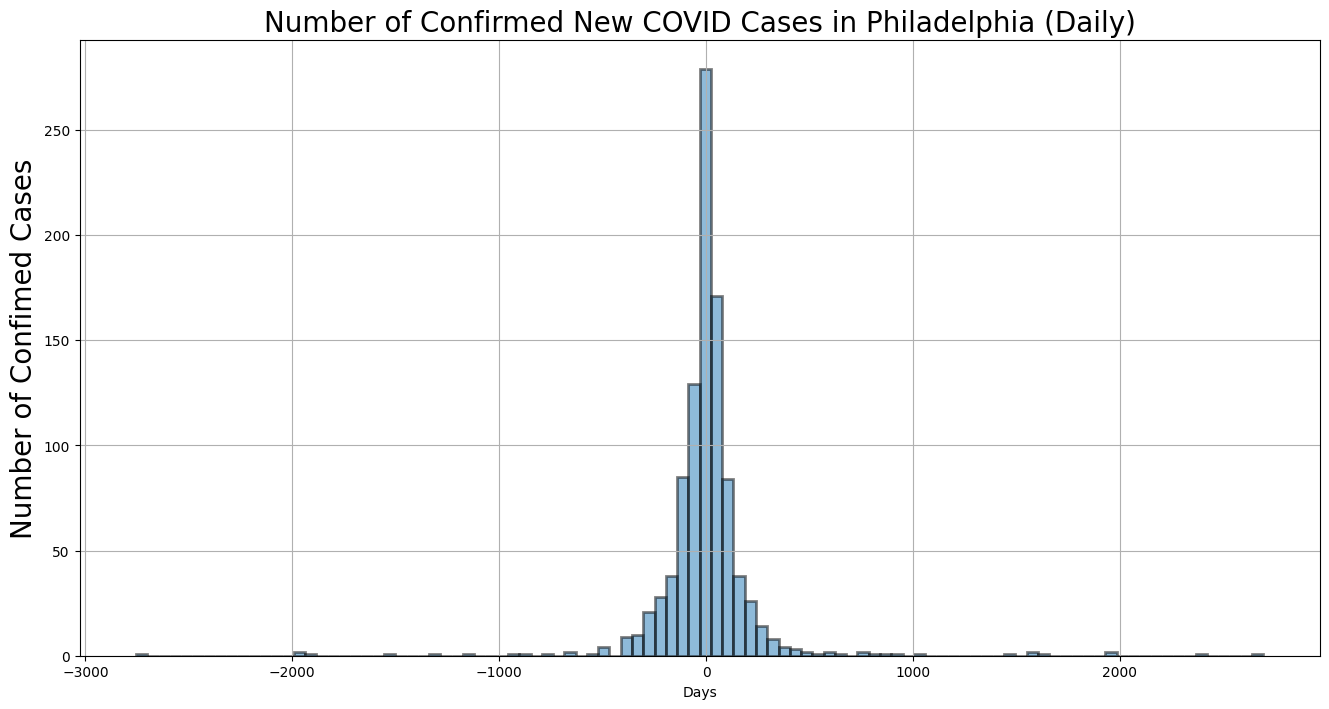

In [111]:
target.hist(bins=100, figsize=(16, 8), alpha=0.5,
            edgecolor="black", linewidth=2)
plt.title(
    'Number of Confirmed New COVID Cases in Philadelphia (Daily)', fontsize=20)
plt.xlabel('Days')
plt.ylabel('Number of Confimed Cases', fontsize=20);

In [112]:
philly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 991 entries, 2020-03-01 to 2022-11-16
Freq: D
Columns: 423 entries, Abdominal obesity to New Cases
dtypes: float64(422), int64(1)
memory usage: 3.2 MB


In [139]:
#this will leave us with 70% of our data in the training set, 20% in the test set, and 10% in our validation set
cutoff_test = round(len(philly_data)*.85)
cutoff_val = round(len(philly_data)*.95)

X_train = symptoms[:cutoff_test]
X_test = symptoms[cutoff_test: cutoff_val]
X_val = symptoms[cutoff_val:]

y_train = target[:cutoff_test]
y_test = target[cutoff_test: cutoff_val]
y_val = target[cutoff_val:]

In [140]:
X_train

Ageusia  Anosmia  Chills  Cough  Diarrhea  Fatigue  Fever   
2020-03-01     0.00     0.09    0.36   7.34      3.97     3.92   4.55  \
2020-03-02     0.00     0.05    0.39   7.56      3.89     4.27   4.48   
2020-03-03     0.00     0.06    0.38   8.09      3.85     4.46   4.80   
2020-03-04     0.00     0.04    0.45   8.44      4.01     4.41   5.26   
2020-03-05     0.04     0.07    0.41   7.89      3.84     4.27   4.68   
...             ...      ...     ...    ...       ...      ...    ...   
2022-06-16     0.04     0.11    0.17   4.39      3.65     4.00   3.37   
2022-06-17     0.10     0.11    0.21   4.26      3.70     3.61   3.46   
2022-06-18     0.00     0.07    0.23   4.41      3.50     3.85   3.15   
2022-06-19     0.09     0.08    0.22   4.37      3.95     3.53   3.16   
2022-06-20     0.06     0.09    0.23   4.30      3.85     4.22   3.26   

            Headache  Myalgia  Nausea  Rhinorrhea  Shortness of breath   
2020-03-01      3.87     0.45    2.08        0.59                 0.68  \
2020-03-02      3.77     0.45    1.84        0.52                 0.80   
2020-03-03      3.68     0.52    2.06        0.50                 0.85   
2020-03-04      3.56     0.52    1.84        0.52                 0.86   
2020-03-05      3.89     0.49    1.87        0.46                 0.97   
...              ...      ...     ...         ...                  ...   
2022-06-16      3.68     0.38    1.92        0.38                 0.63   
2022-06-17      3.51     0.45    1.96        0.37                 0.57   
2022-06-18      3.30     0.58    1.96        0.40                 0.52   
2022-06-19      3.68     0.37    2.08        0.41                 0.62   
2022-06-20      3.80     0.45    2.07        0.42                 0.75   

            Sinusitis  Sore throat  Vomiting  
2020-03-01       1.82         2.74      3.20  
2020-03-02       1.92         2.91      2.85  
2020-03-03       1.78         2.56      2.94  
2020-03-04       1.78         2.52      3.01  
2020-03-05       1.80         2.46      2.73  
...               ...          ...       ...  
2022-06-16       1.53         2.06      2.35  
2022-06-17       1.50         1.83      2.45  
2022-06-18       1.40         1.89      2.48  
2022-06-19       1.57         1.86      2.69  
2022-06-20       1.83         2.08      2.47  

[842 rows x 15 columns]

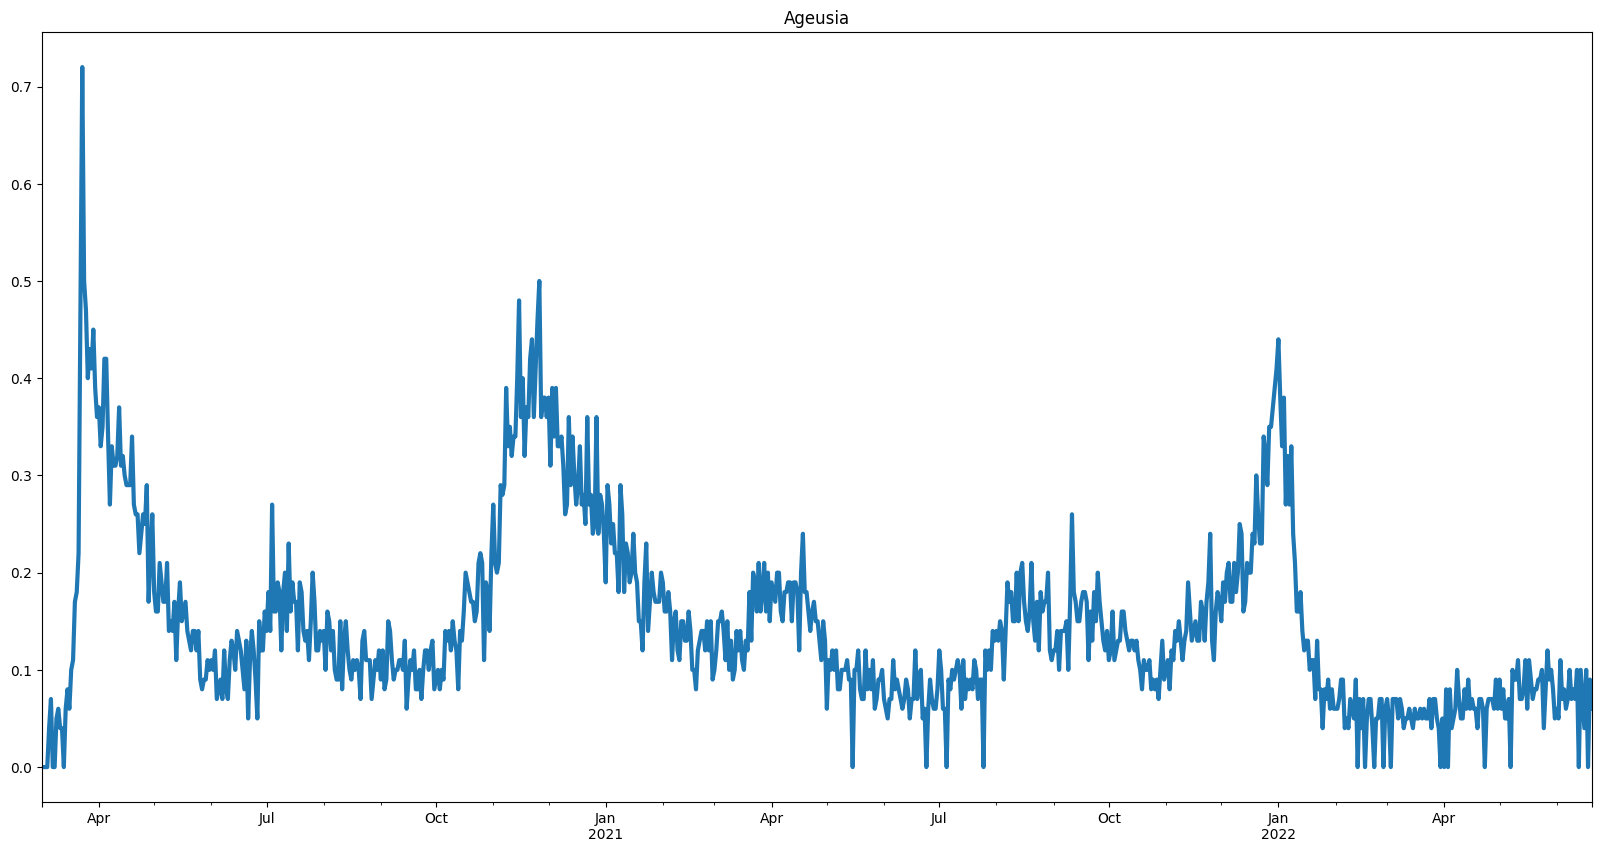

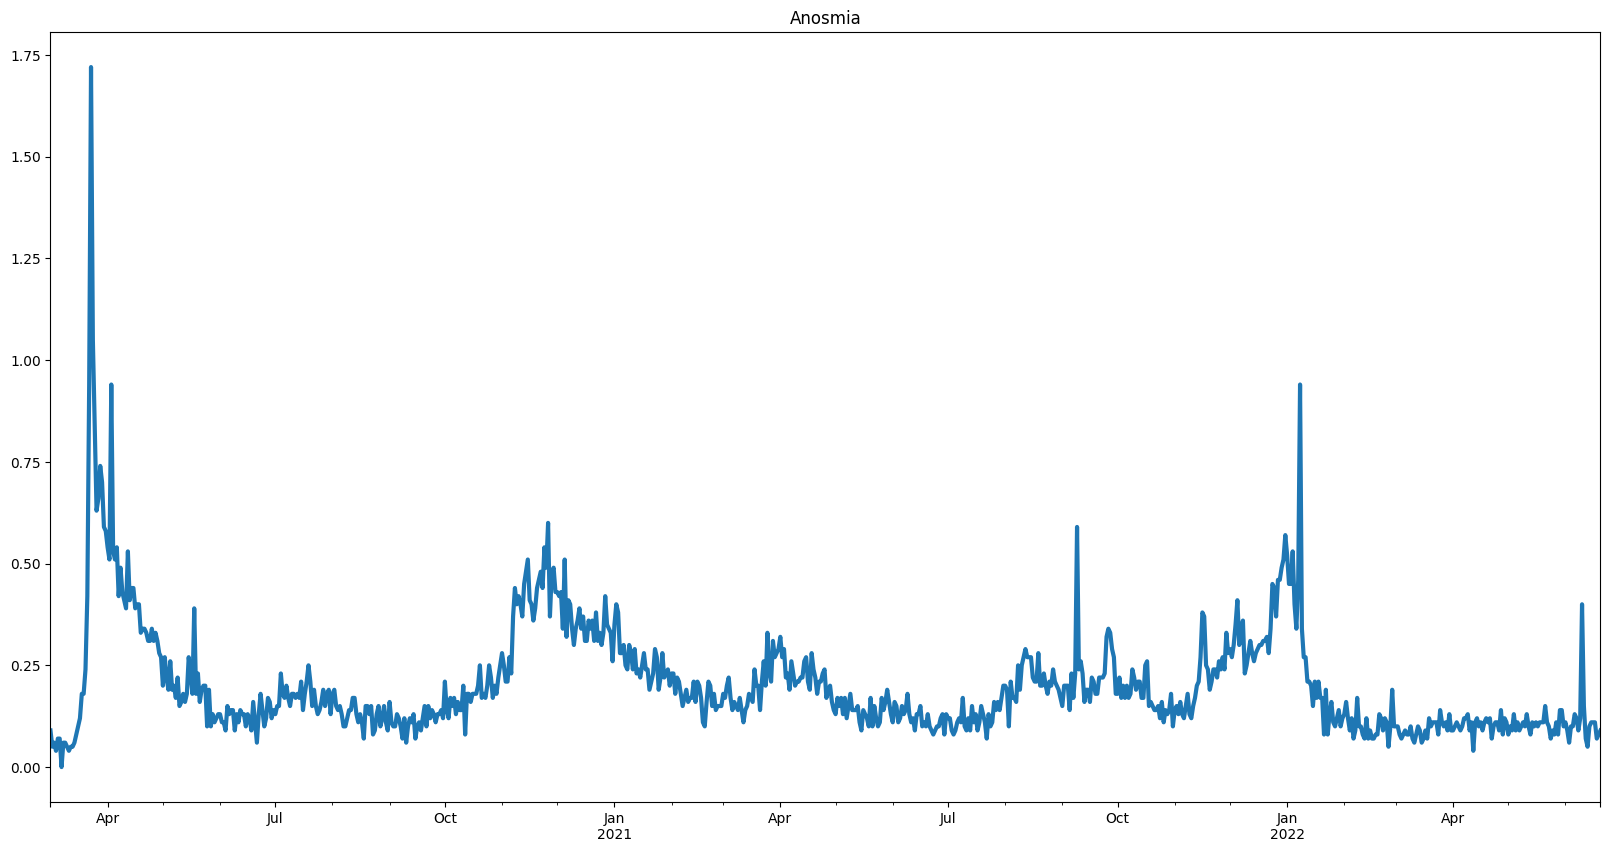

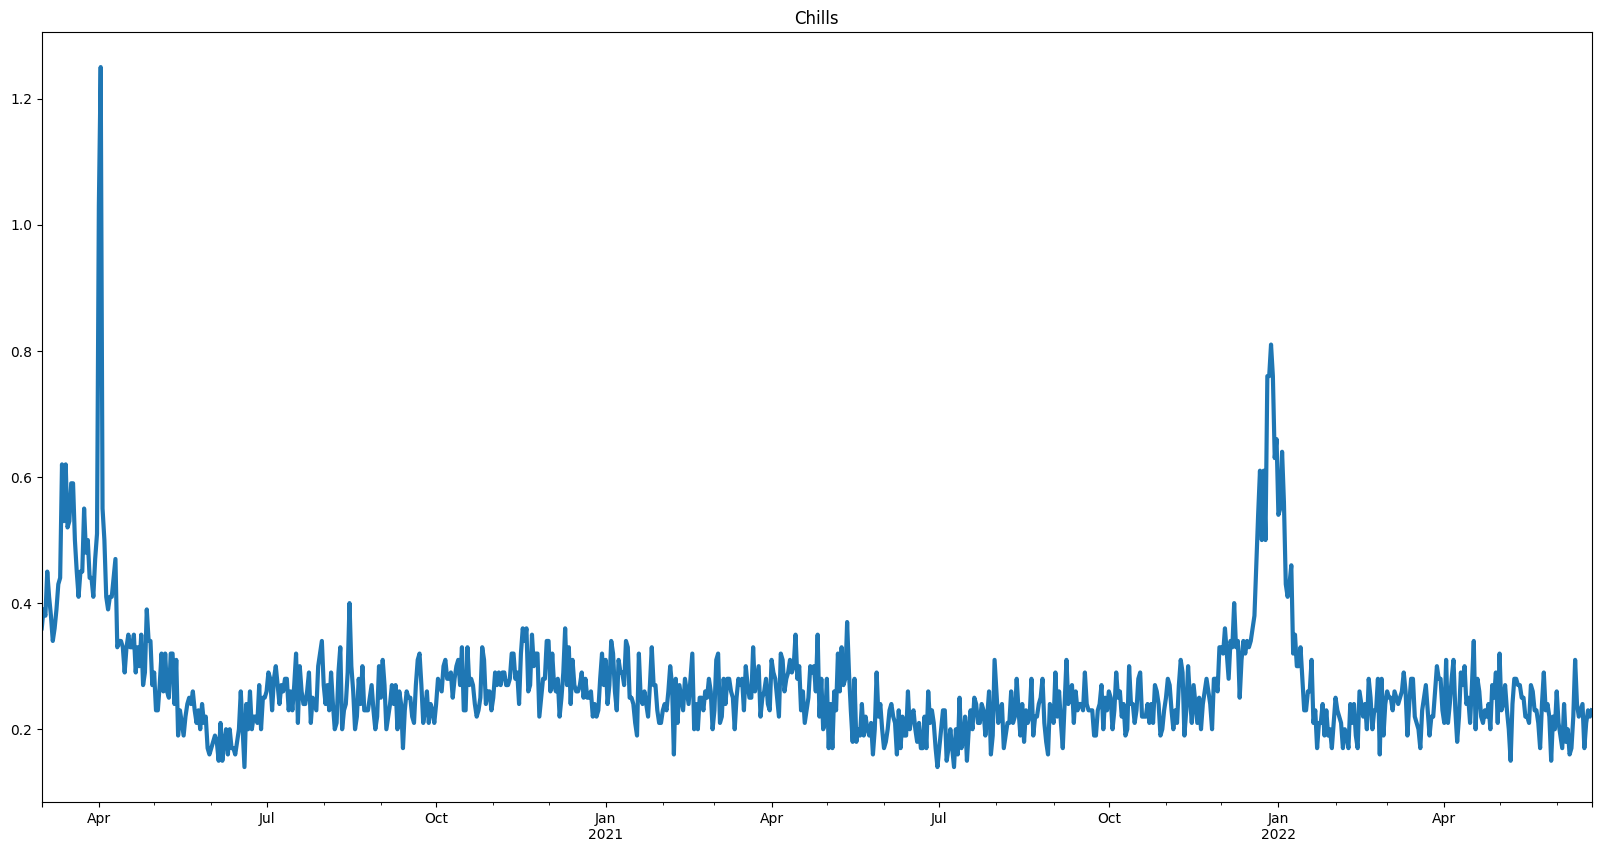

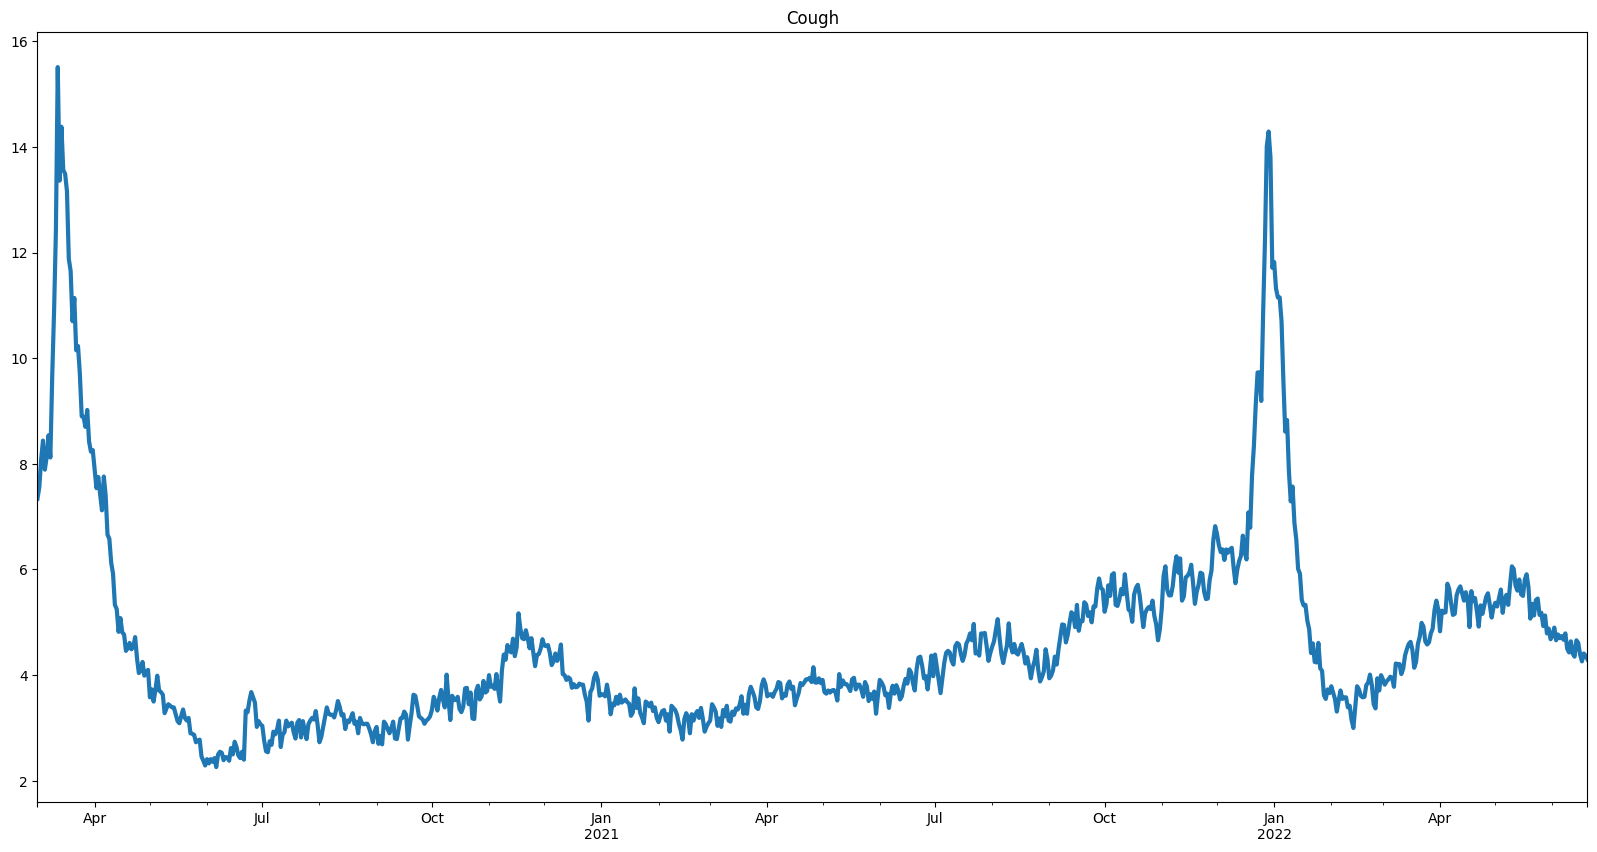

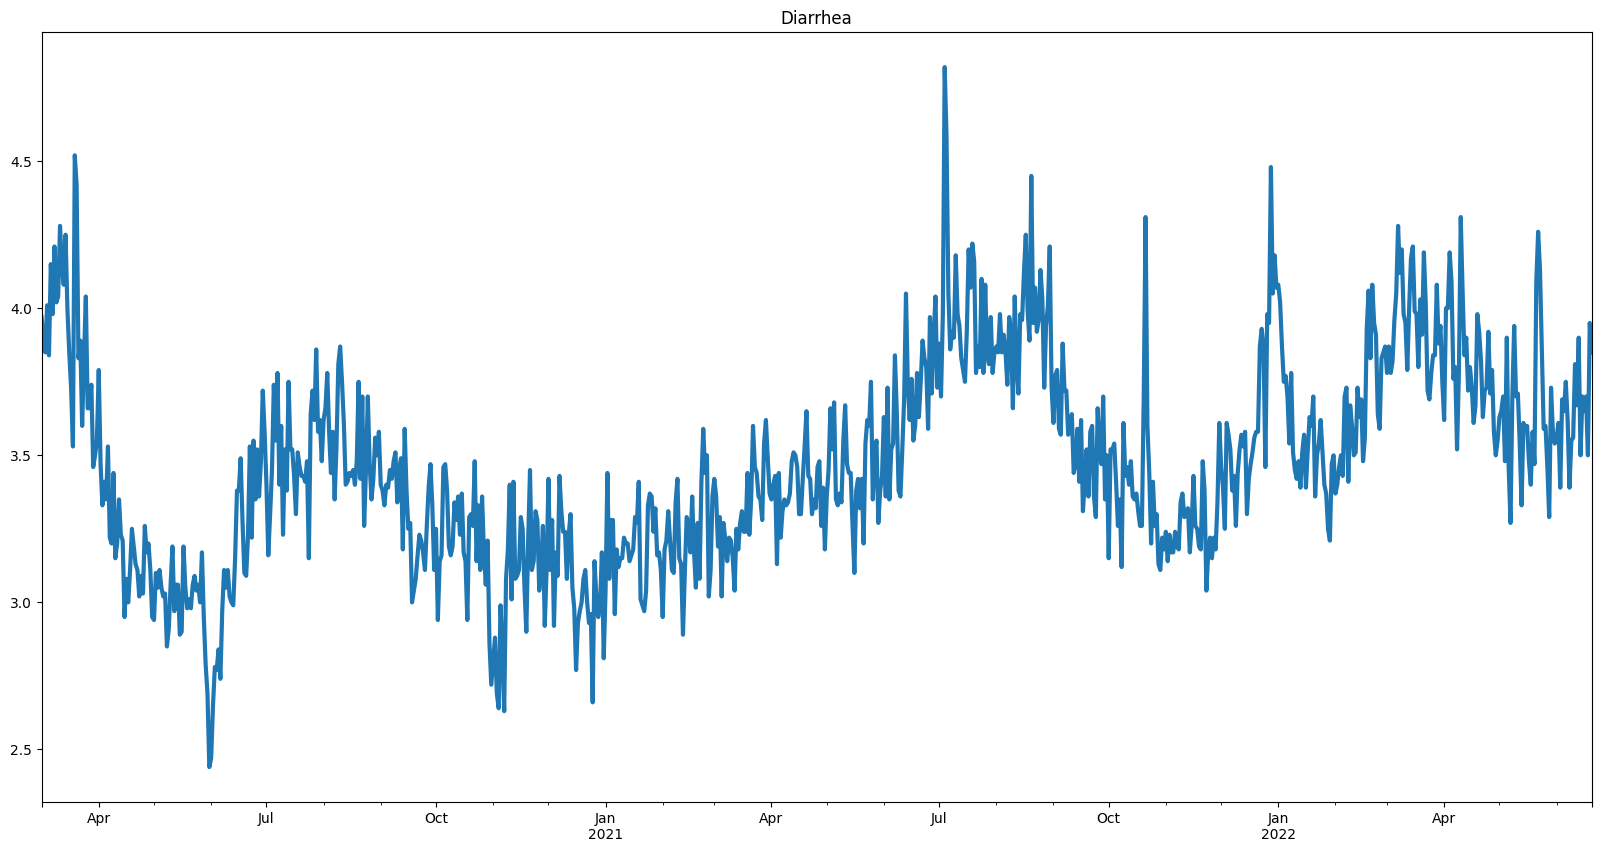

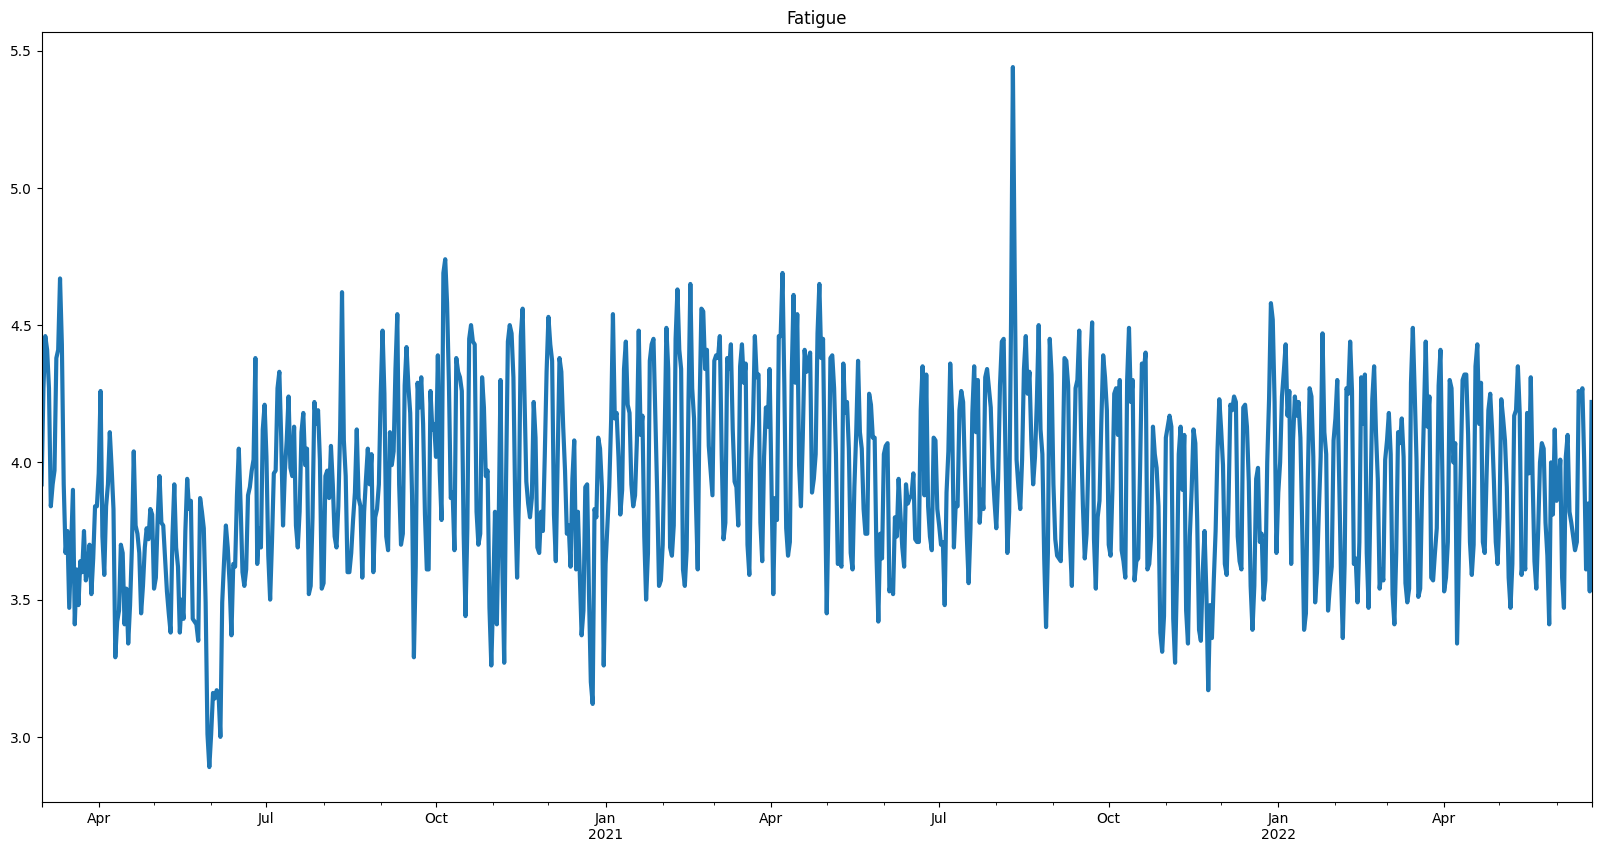

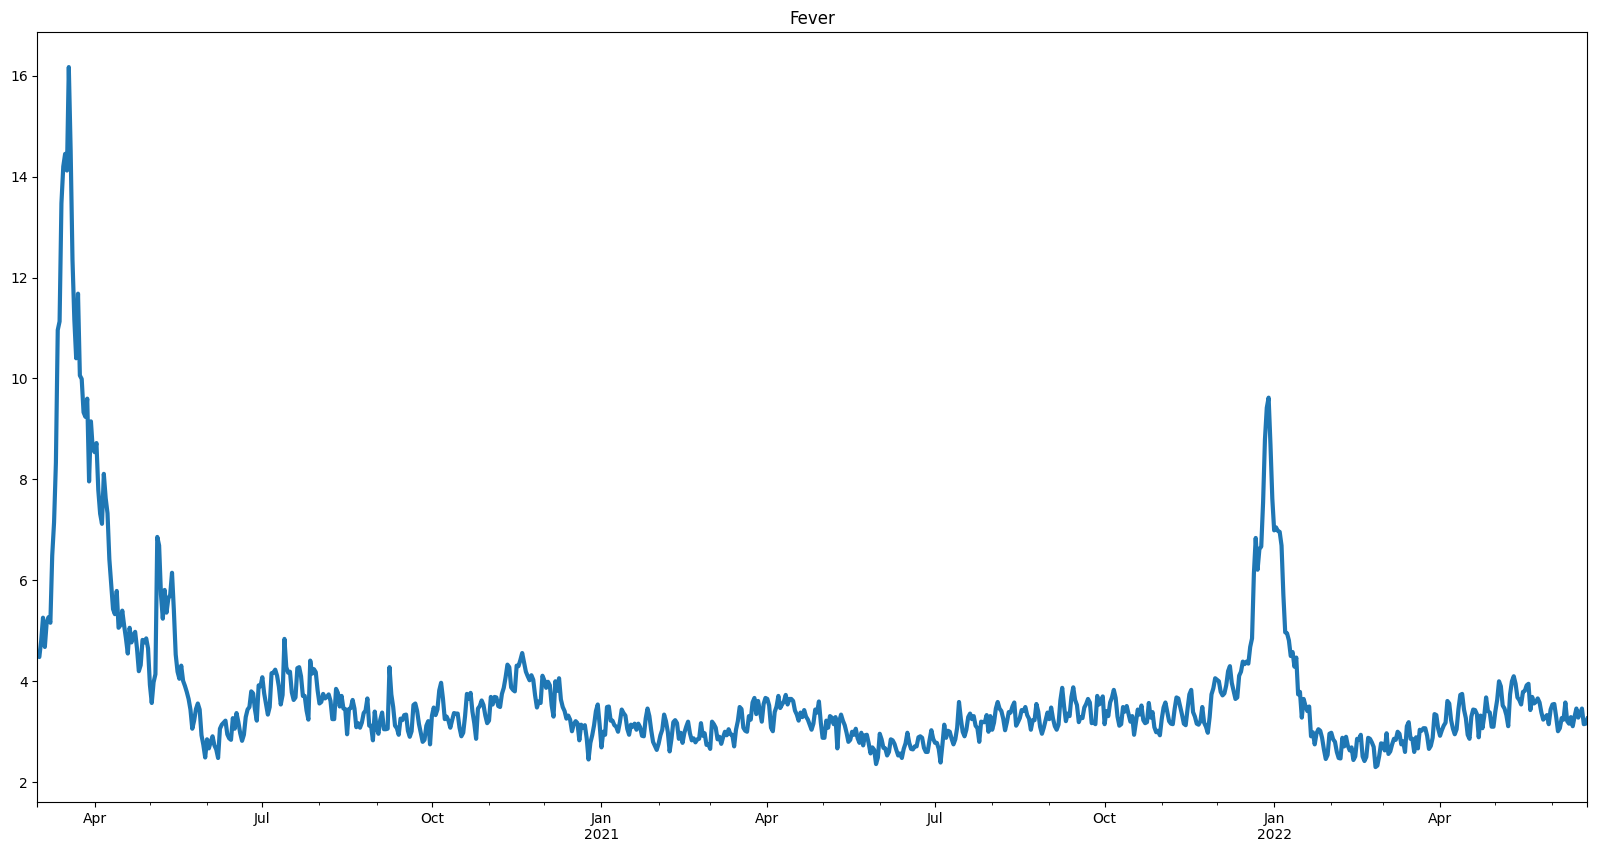

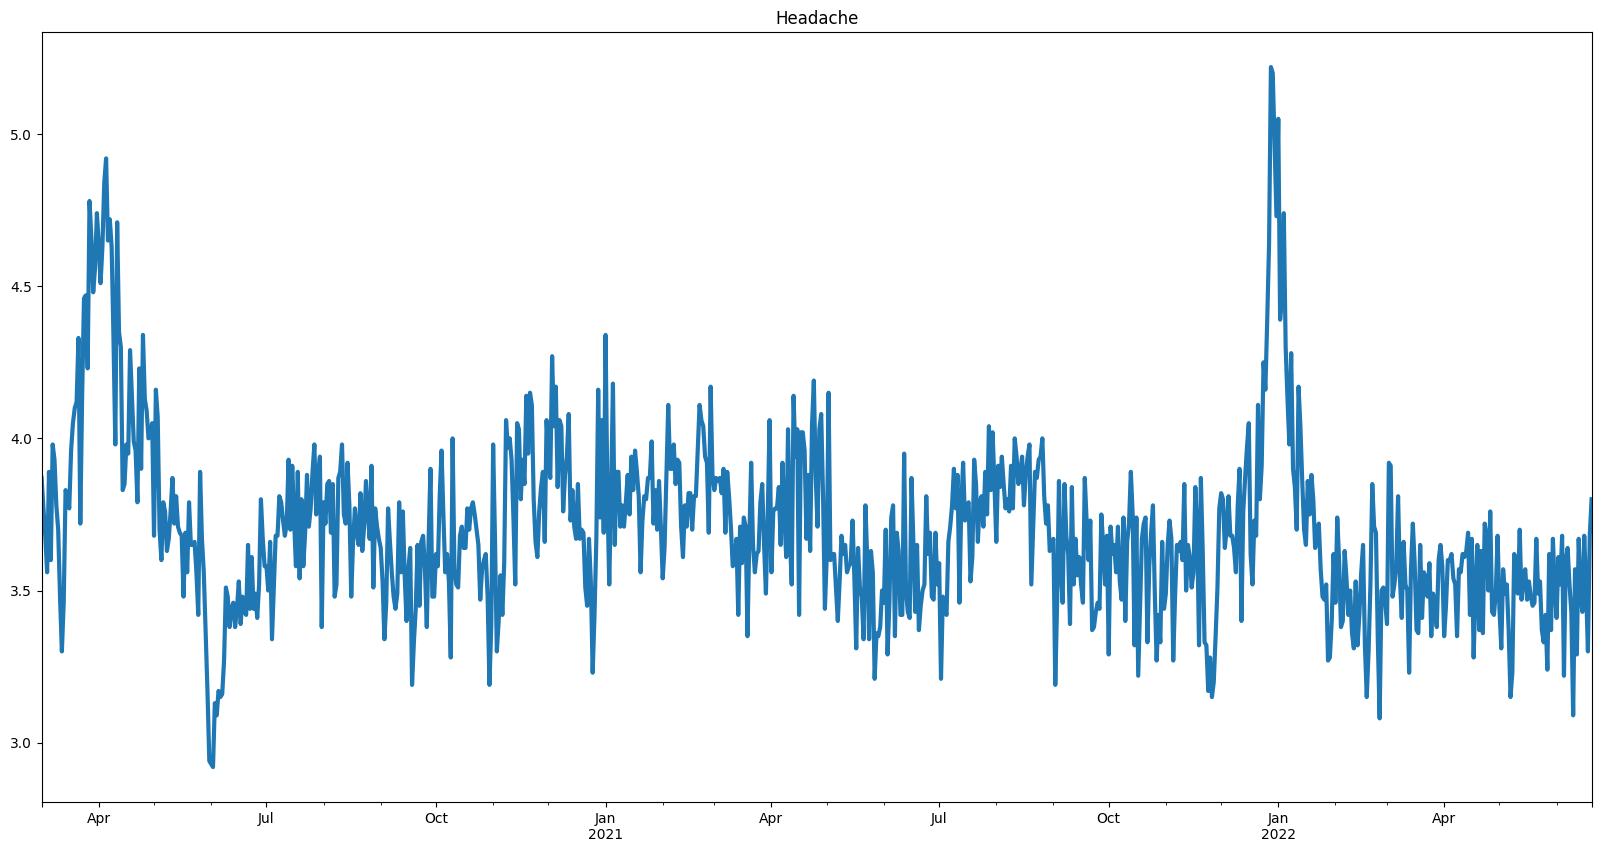

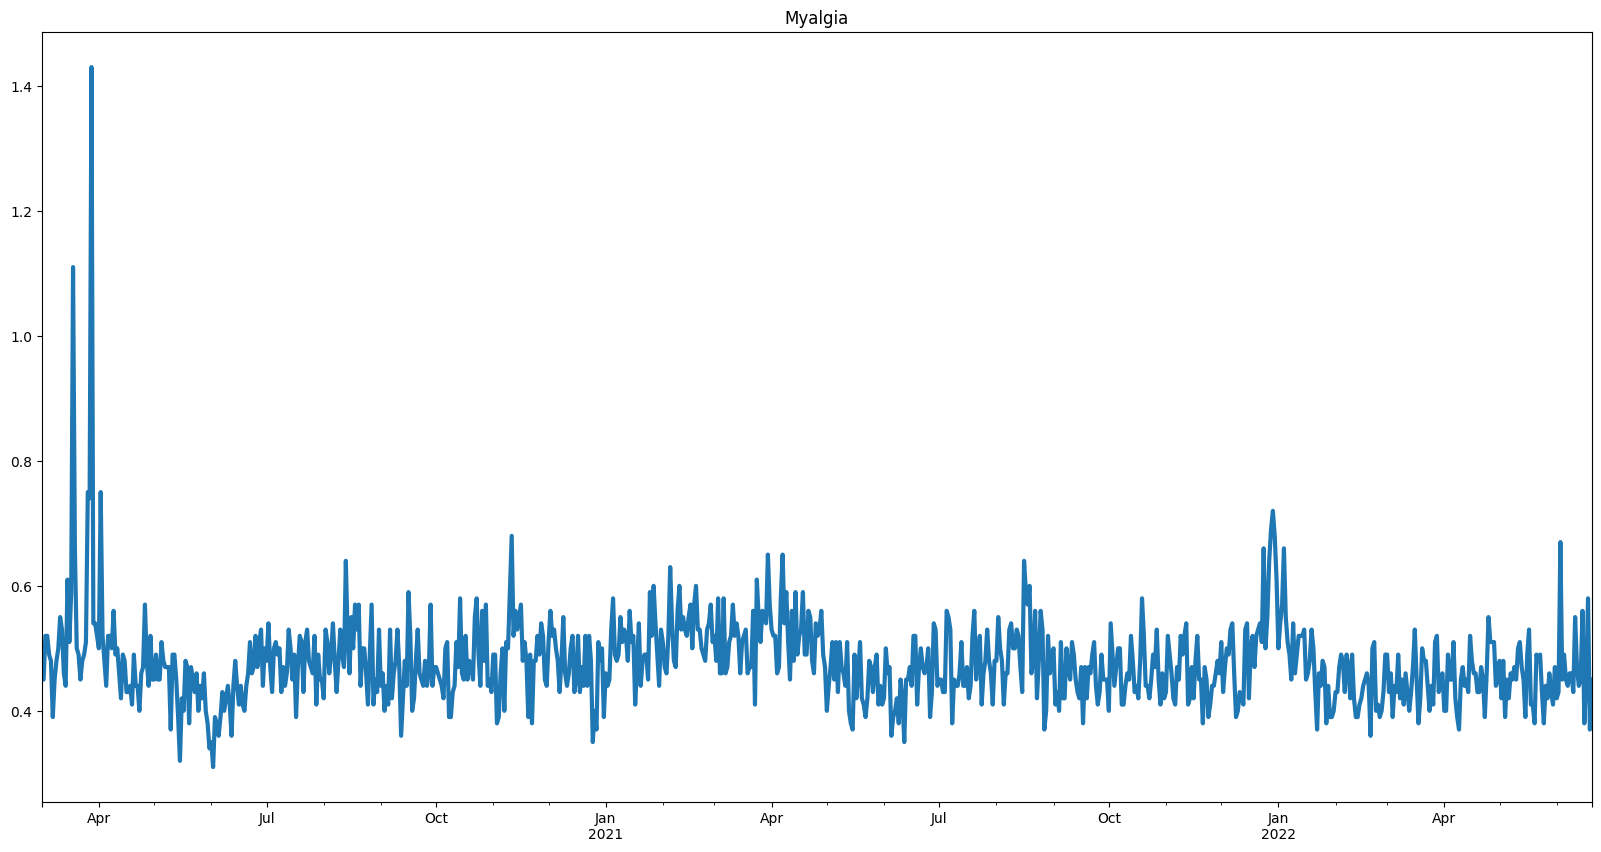

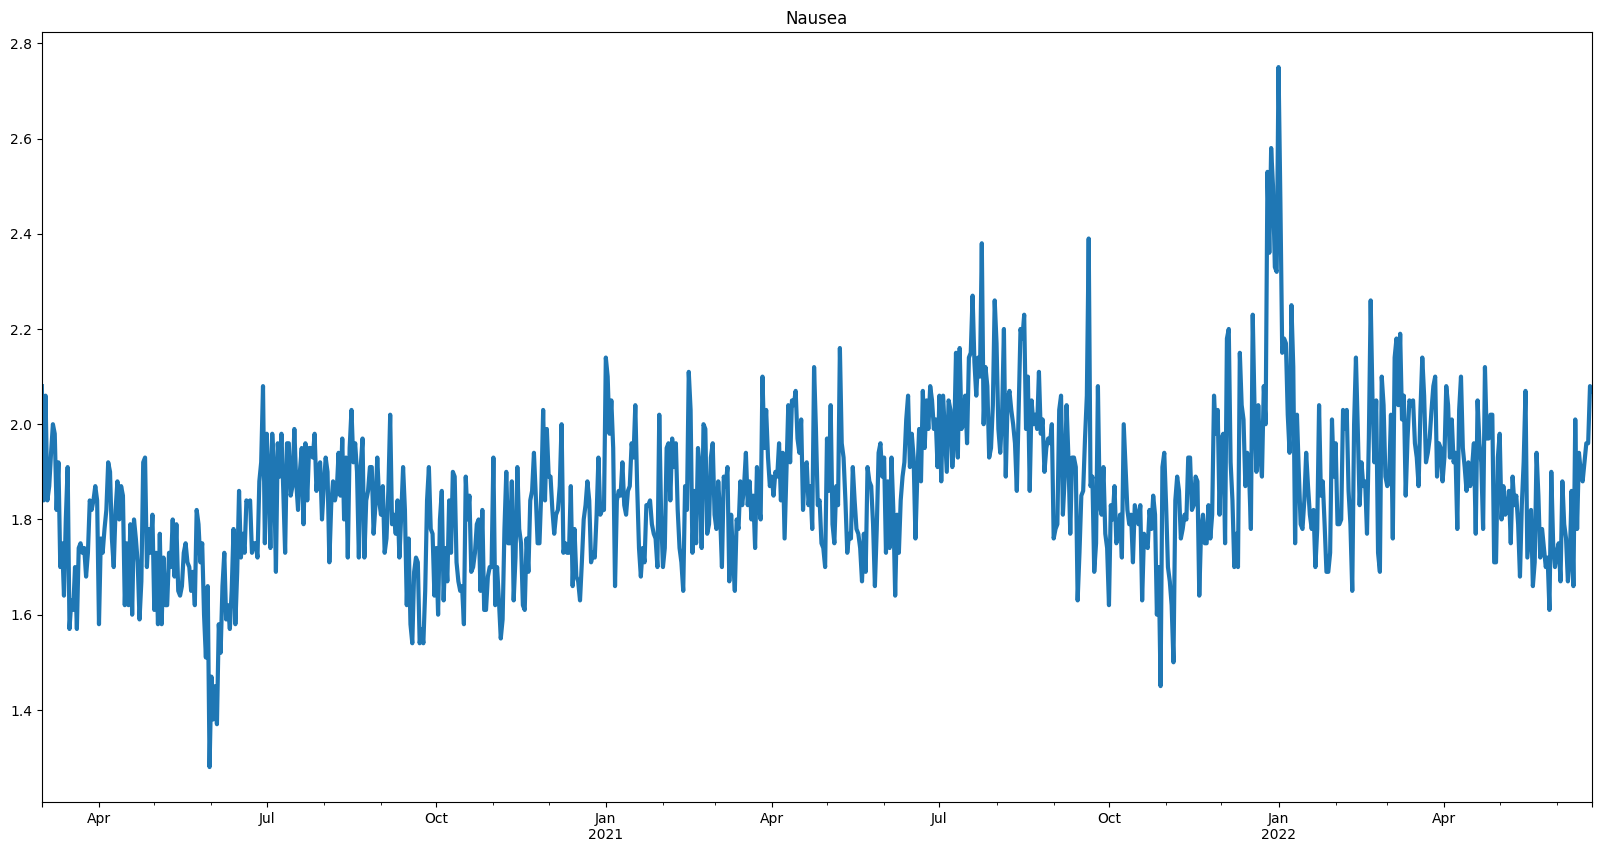

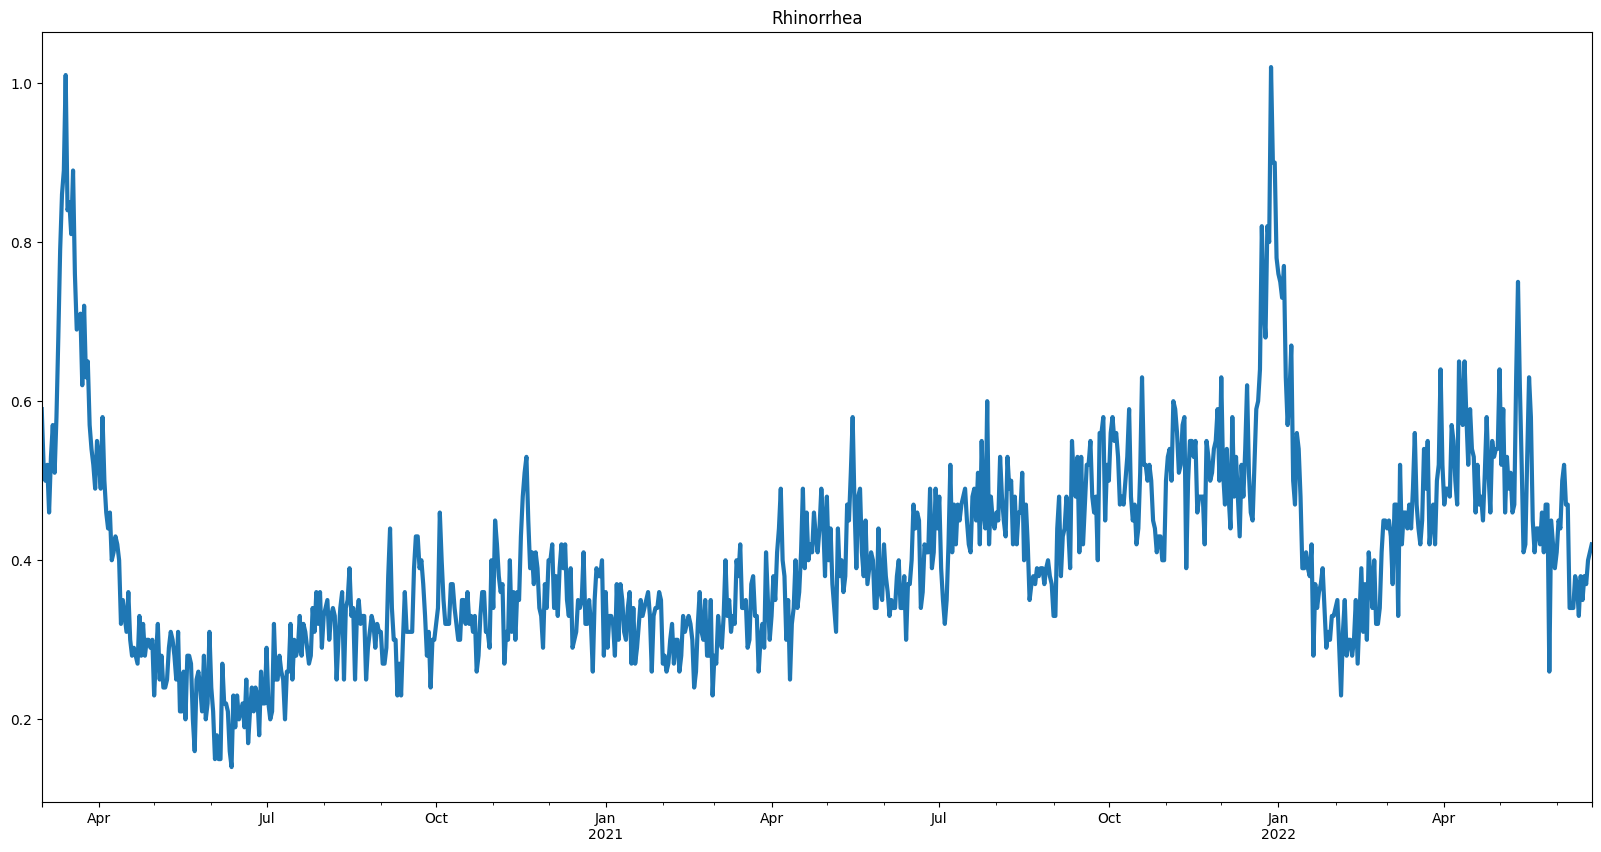

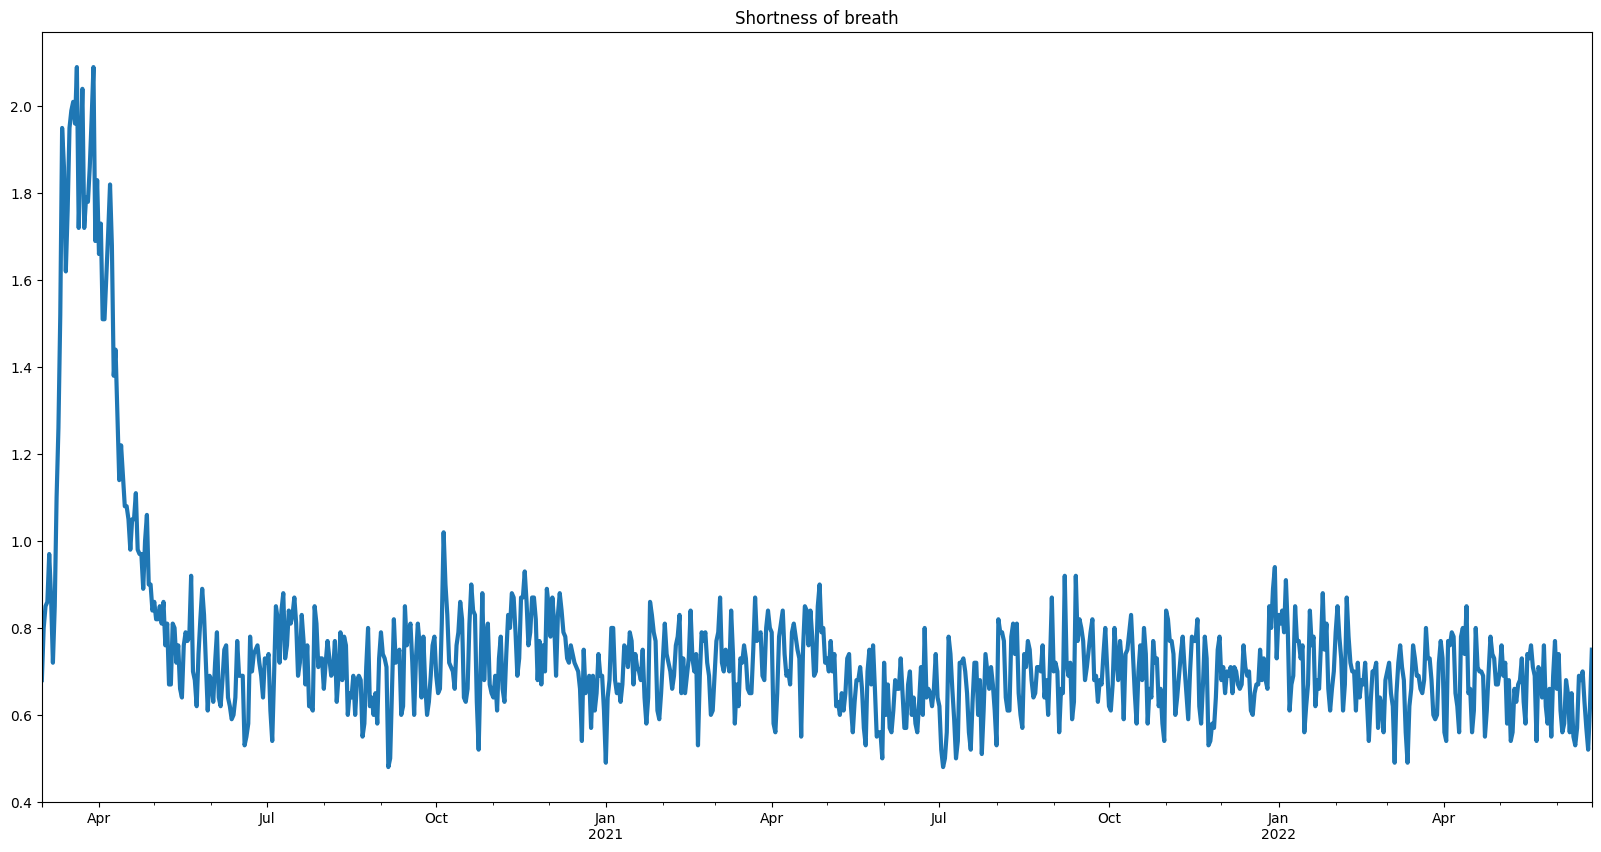

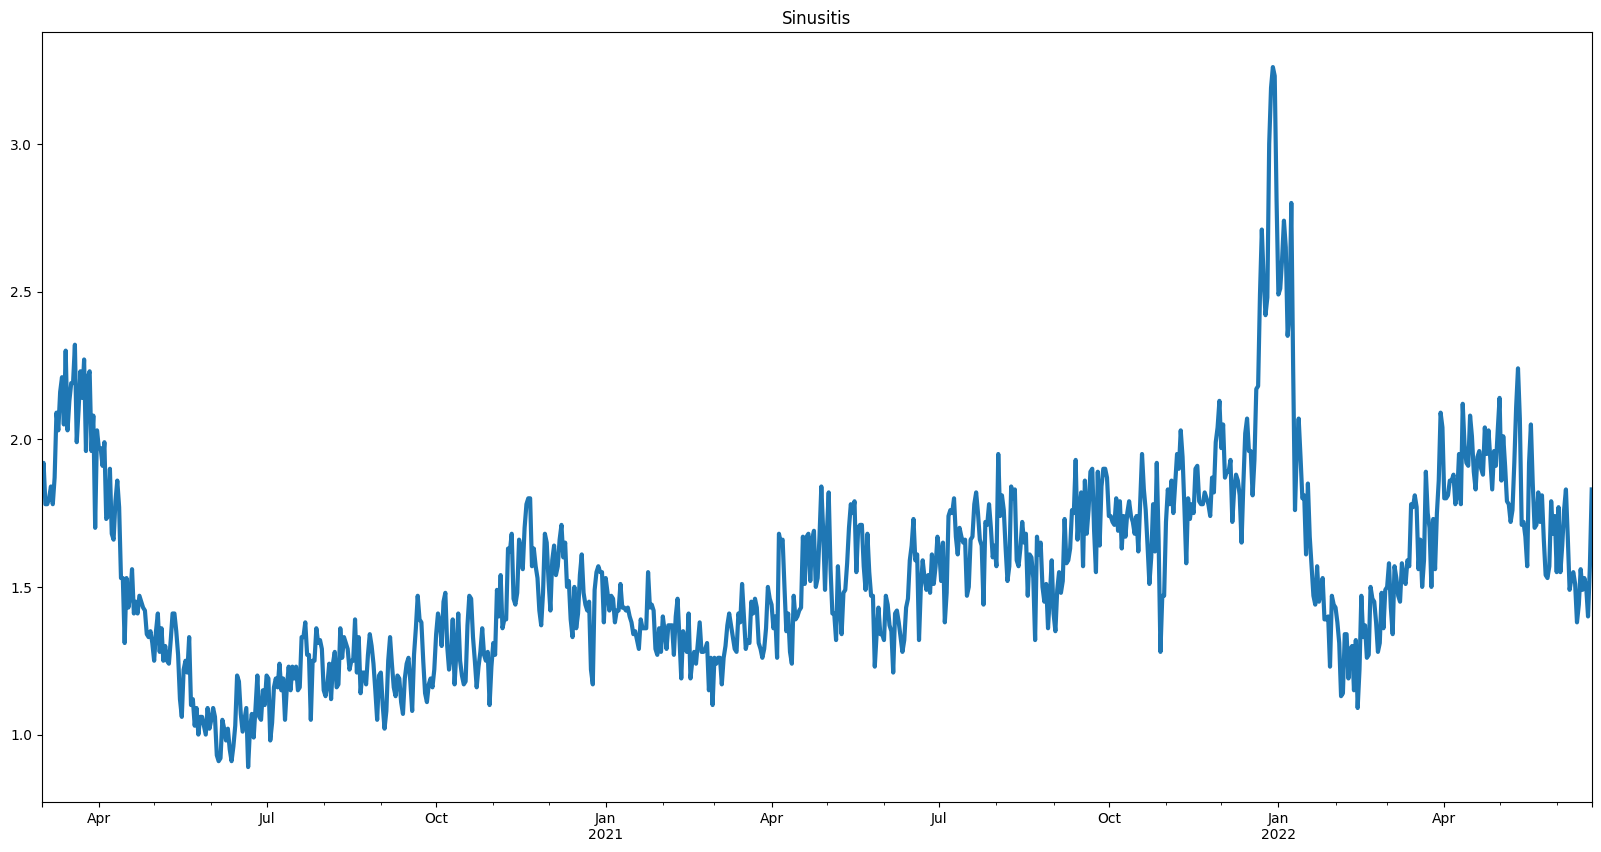

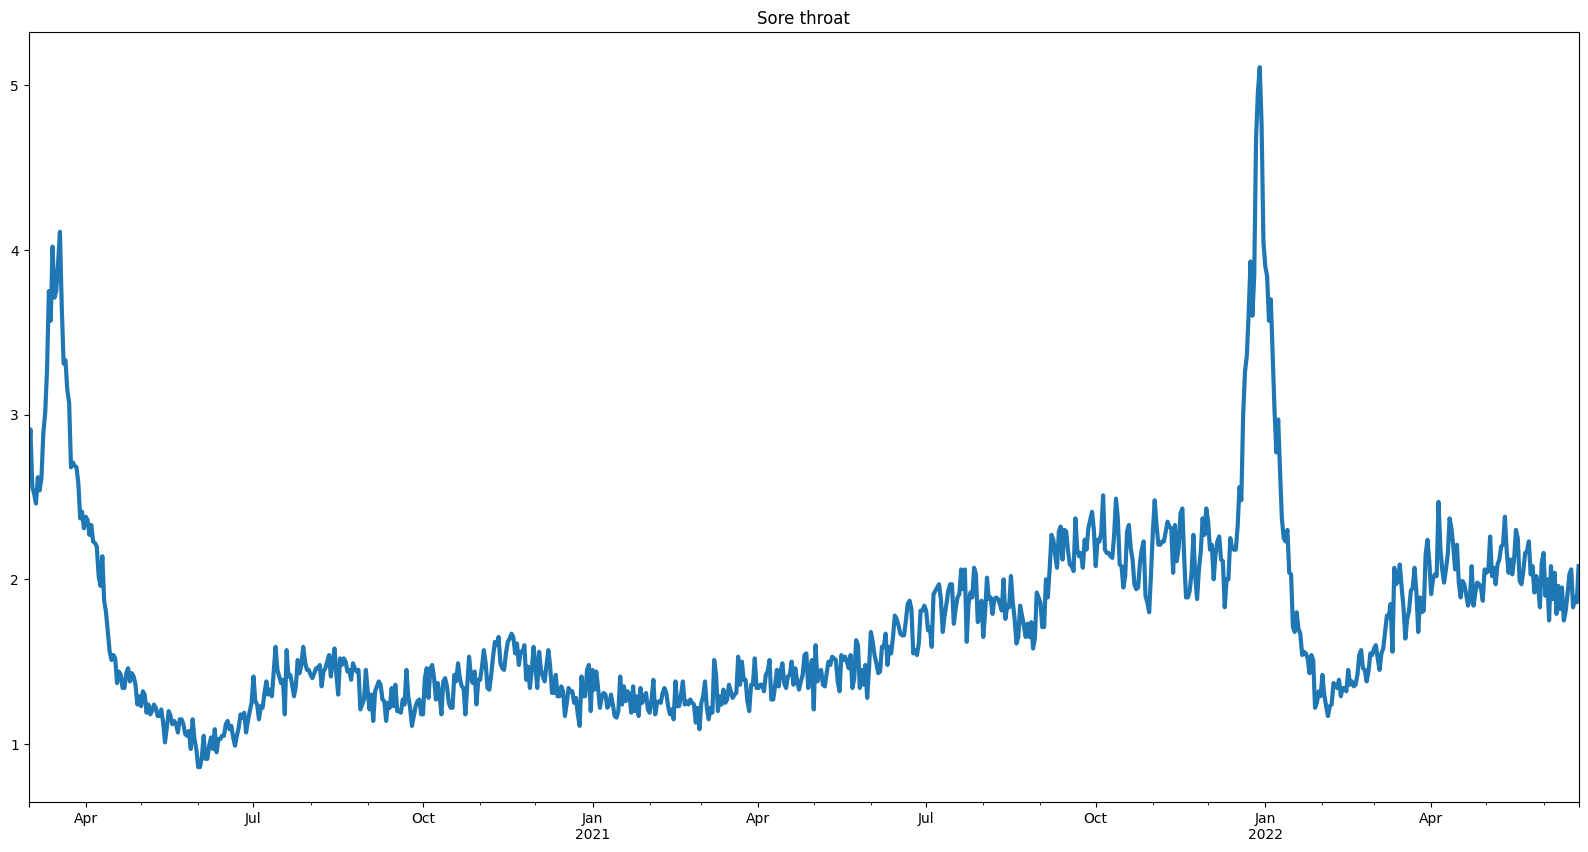

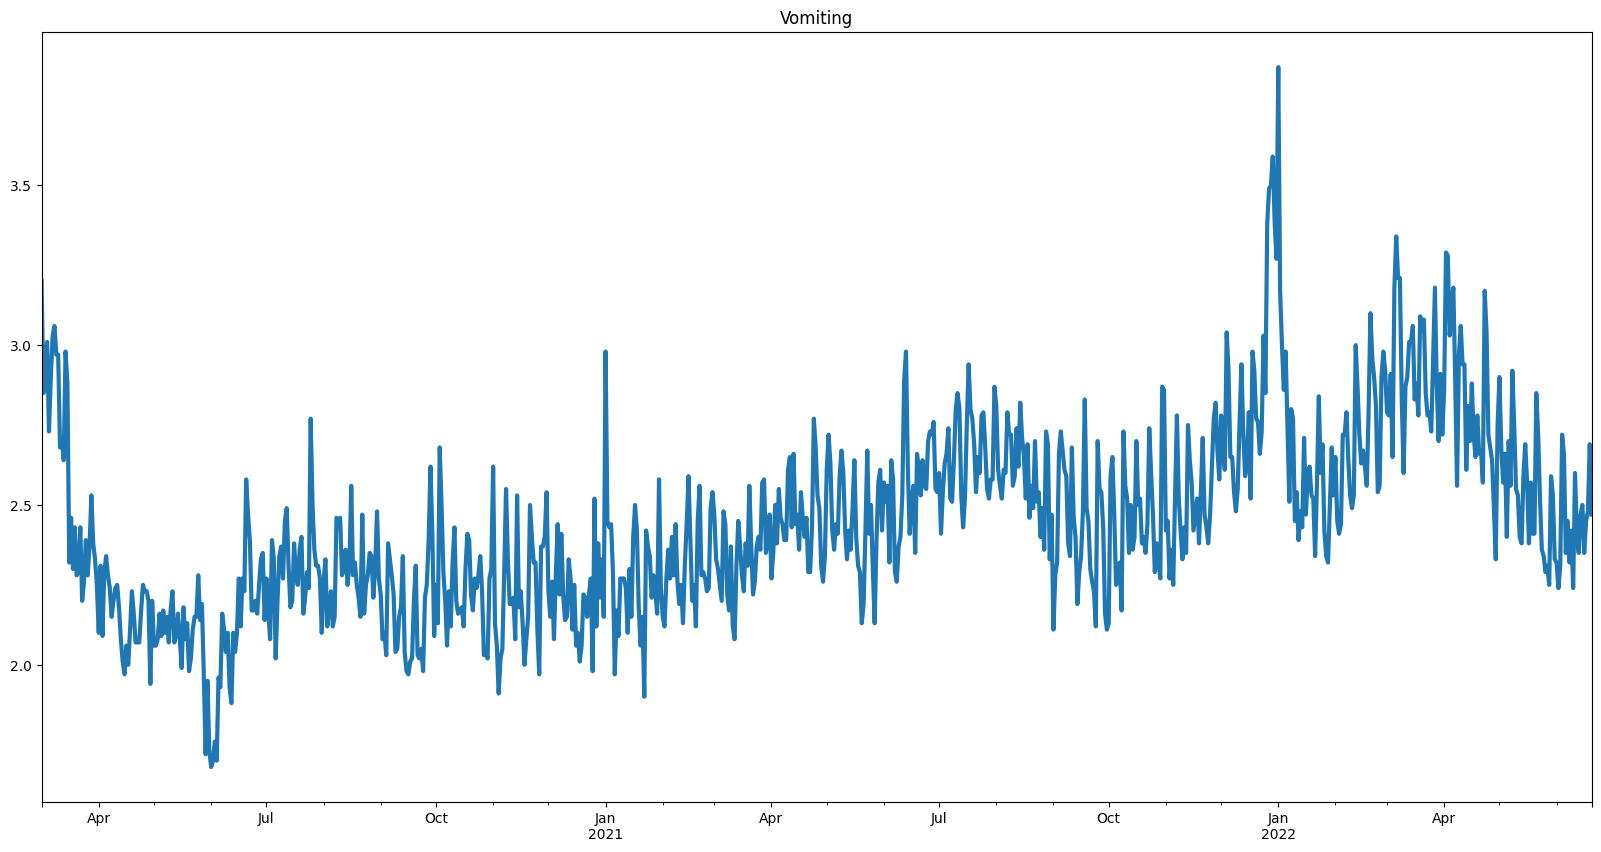

In [141]:
for i in selected_features:
    ax = X_train[i].plot.line(figsize=(20, 10), linewidth=3)
    plt.title(f"{i}")
    plt.show()

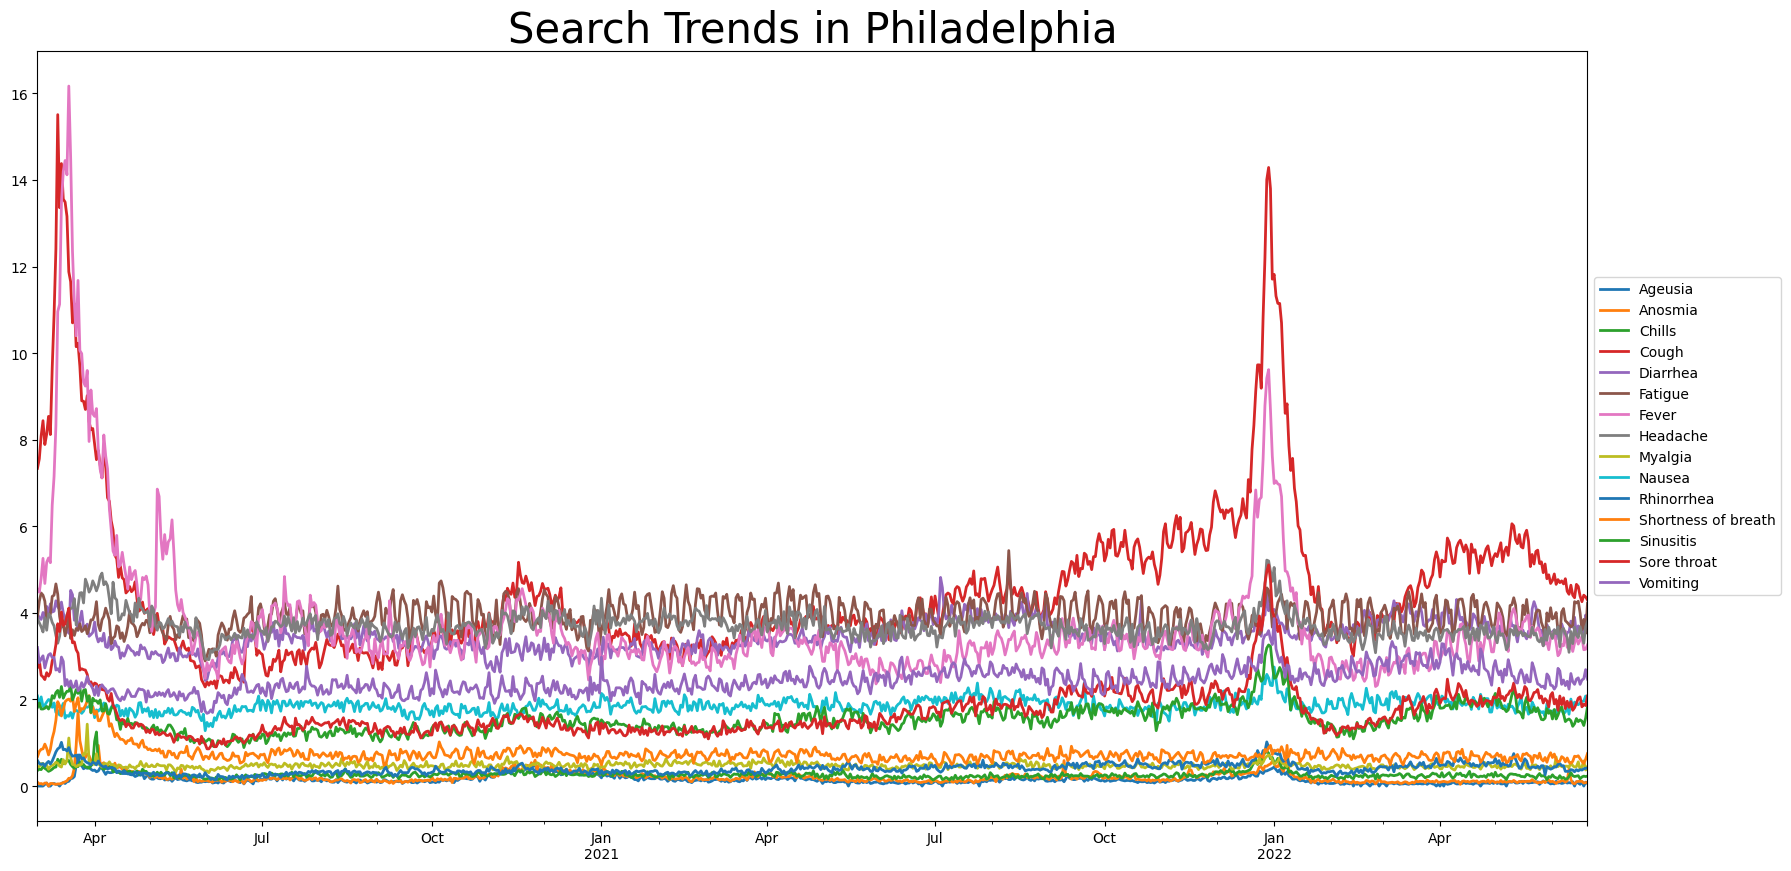

In [142]:
for symp in selected_features:
    ax = X_train[symp].plot.line(figsize=(20, 10), linewidth=2)
    ax.legend(selected_features, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Search Trends in Philadelphia', fontsize=30)

Text(0.5, 1.0, 'New COVID Cases in Philadelphia (Raw)')

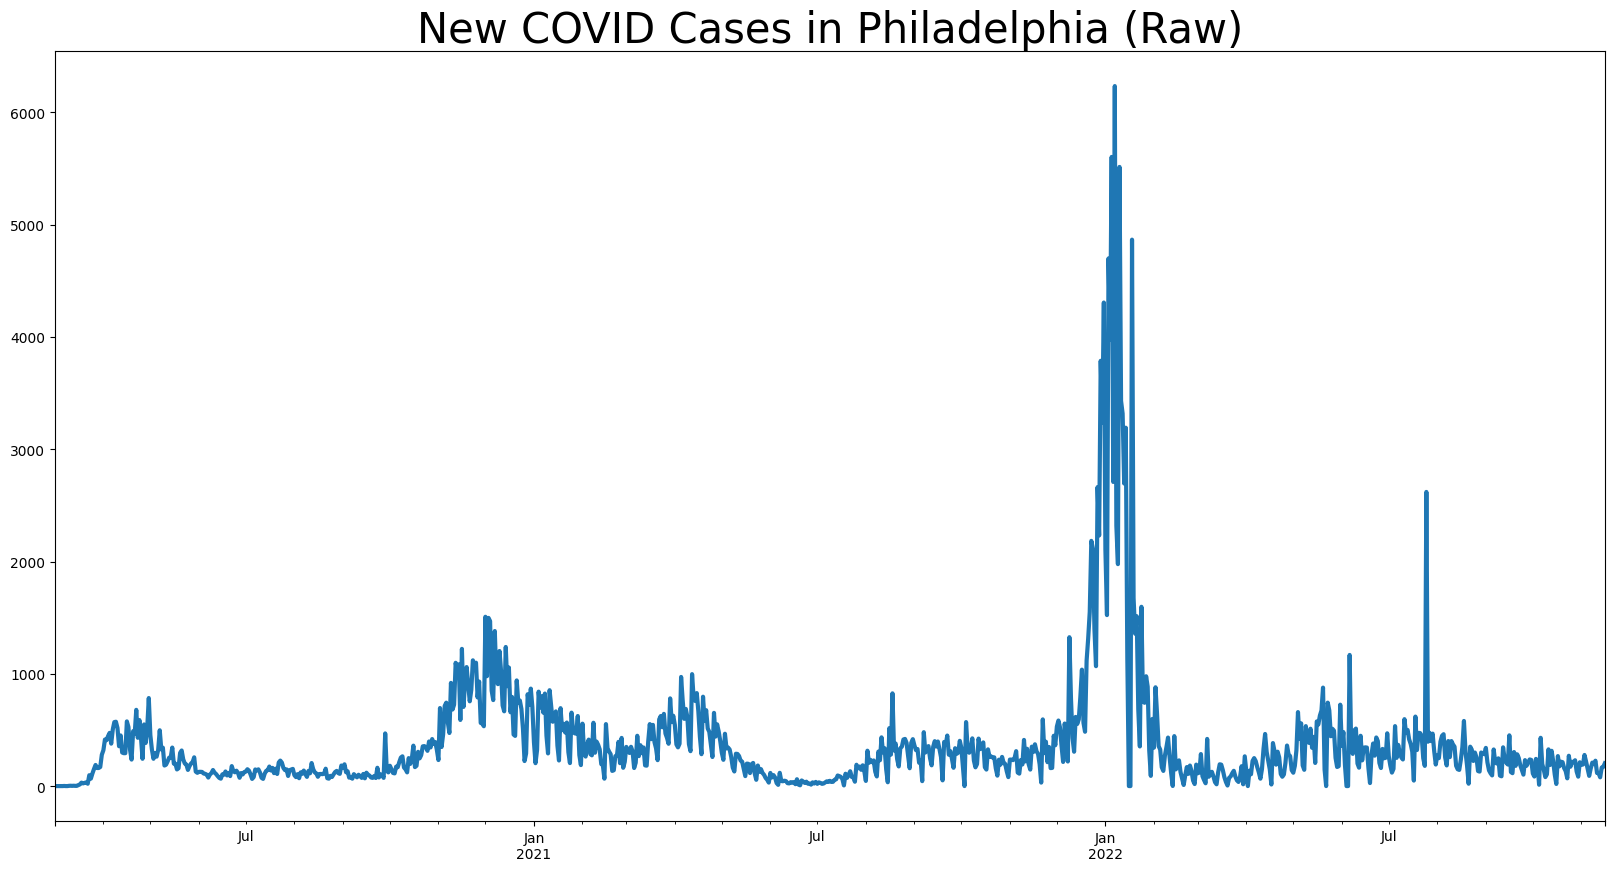

In [143]:
ax = target_cases.plot(figsize=(20, 10), linewidth=3)
plt.title('New COVID Cases in Philadelphia (Raw)', fontsize=30)

Text(0.5, 1.0, 'New COVID Cases in Philadelphia (Minus the 7-Day Rolling Mean)')

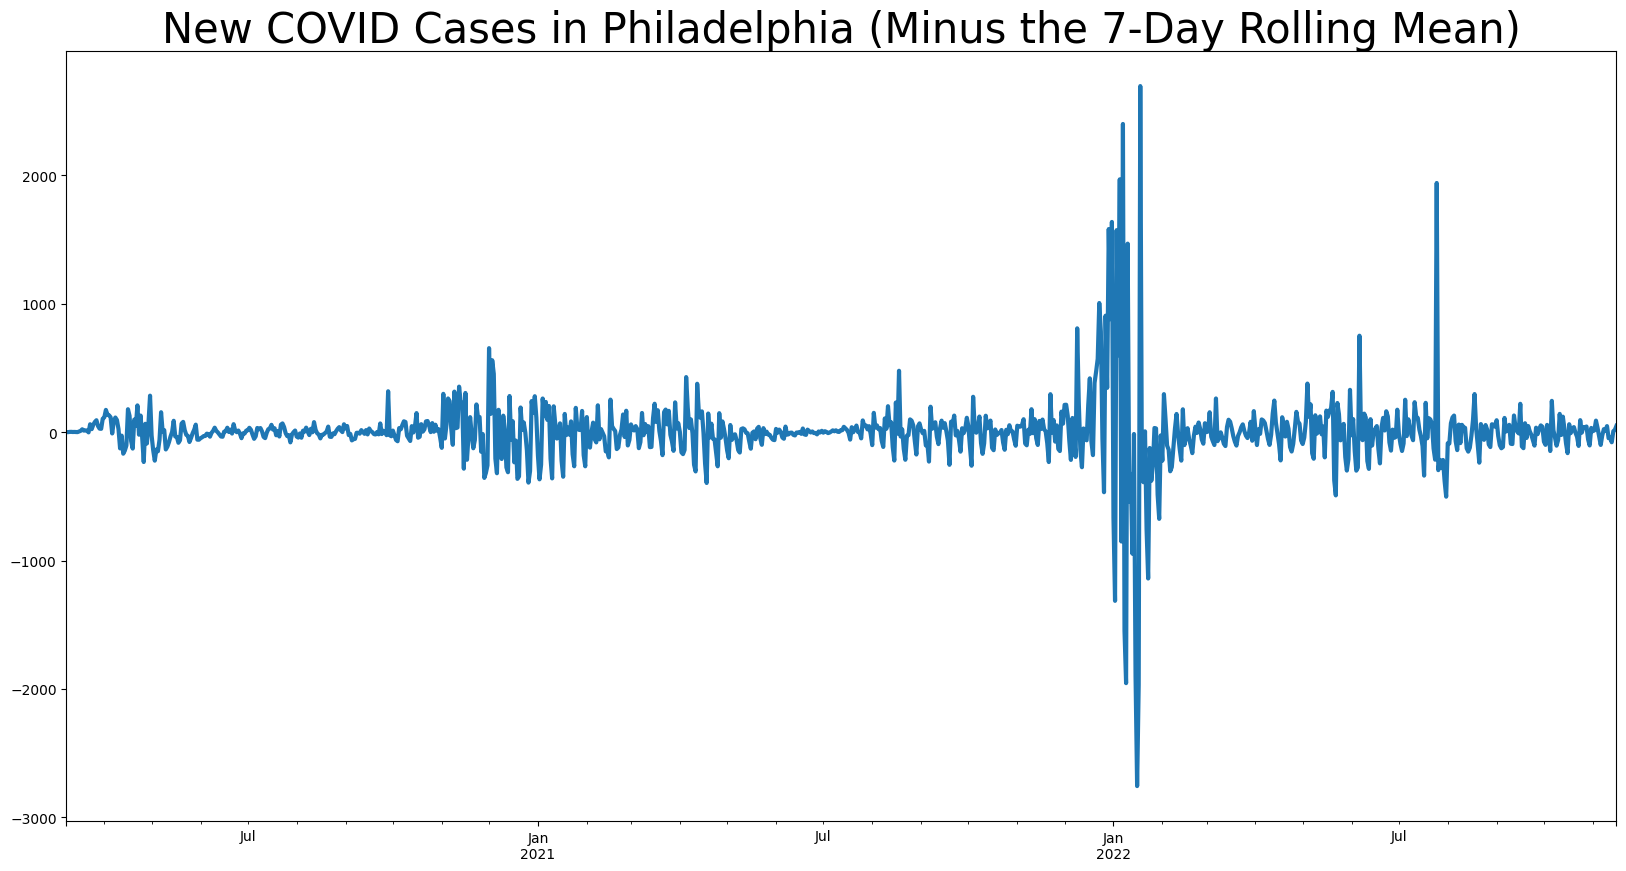

In [144]:
ax = target.plot(figsize=(20, 10), linewidth=3)
plt.title('New COVID Cases in Philadelphia (Minus the 7-Day Rolling Mean)', fontsize=30)

In [145]:
# Dicky Fuller Test for Stationarity
result = adfuller(y_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.242019
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


In [146]:
target_cases

2020-03-01      0
2020-03-02      0
2020-03-03      0
2020-03-04      0
2020-03-05      0
             ... 
2022-11-12    116
2022-11-13     78
2022-11-14    165
2022-11-15    171
2022-11-16    203
Freq: D, Name: New Cases, Length: 991, dtype: int64

In [147]:
dataframe=pd.DataFrame(y_train)
dataframe

0
2020-03-08   -0.1
2020-03-09   -0.1
2020-03-10    1.6
2020-03-11    2.1
2020-03-12    0.9
...           ...
2022-06-23  162.0
2022-06-24  121.7
2022-06-25  -79.9
2022-06-26 -144.0
2022-06-27   19.3

[842 rows x 1 columns]

In [148]:
dataframe["ds"] =dataframe.index
dataframe

0         ds
2020-03-08   -0.1 2020-03-08
2020-03-09   -0.1 2020-03-09
2020-03-10    1.6 2020-03-10
2020-03-11    2.1 2020-03-11
2020-03-12    0.9 2020-03-12
...           ...        ...
2022-06-23  162.0 2022-06-23
2022-06-24  121.7 2022-06-24
2022-06-25  -79.9 2022-06-25
2022-06-26 -144.0 2022-06-26
2022-06-27   19.3 2022-06-27

[842 rows x 2 columns]

In [149]:
dataframe.rename(columns = {0:'y'}, inplace= True)
dataframe


y         ds
2020-03-08   -0.1 2020-03-08
2020-03-09   -0.1 2020-03-09
2020-03-10    1.6 2020-03-10
2020-03-11    2.1 2020-03-11
2020-03-12    0.9 2020-03-12
...           ...        ...
2022-06-23  162.0 2022-06-23
2022-06-24  121.7 2022-06-24
2022-06-25  -79.9 2022-06-25
2022-06-26 -144.0 2022-06-26
2022-06-27   19.3 2022-06-27

[842 rows x 2 columns]

In [150]:
dataframe = dataframe[['ds', 'y']]


In [151]:
dataframe

ds      y
2020-03-08 2020-03-08   -0.1
2020-03-09 2020-03-09   -0.1
2020-03-10 2020-03-10    1.6
2020-03-11 2020-03-11    2.1
2020-03-12 2020-03-12    0.9
...               ...    ...
2022-06-23 2022-06-23  162.0
2022-06-24 2022-06-24  121.7
2022-06-25 2022-06-25  -79.9
2022-06-26 2022-06-26 -144.0
2022-06-27 2022-06-27   19.3

[842 rows x 2 columns]

In [152]:
Model = Prophet(interval_width=0.95)
Model

In [153]:
Model.fit(dataframe)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/tmplpm_pfx3/nic7xezh.json
DEBUG:cmdstanpy:input tempfile: /var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/tmplpm_pfx3/nbj4aifb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/rachelsanderlin/Flatiron/phase_5/Predicting-COVID-19-in-PA/env/lib/python3.9/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35295', 'data', 'file=/var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/tmplpm_pfx3/nic7xezh.json', 'init=/var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/tmplpm_pfx3/nbj4aifb.json', 'output', 'file=/var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/tmplpm_pfx3/prophet_modelfaw809sb/prophet_model-20230410120251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:02:51 - cmdstanpy - INFO - Chain [1] start processing
INF

In [154]:
future_dates = Model.make_future_dataframe(periods=180, freq='D')
future_dates.tail()

ds
1017 2022-12-20
1018 2022-12-21
1019 2022-12-22
1020 2022-12-23
1021 2022-12-24

In [155]:
forecast = Model.predict(future_dates)
forecast.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper   
0 2020-03-08 -3.174236 -763.973407  307.004454    -3.174236    -3.174236  \
1 2020-03-09 -3.164890 -476.071969  574.664527    -3.164890    -3.164890   
2 2020-03-10 -3.155544 -446.433248  538.075658    -3.155544    -3.155544   
3 2020-03-11 -3.146199 -451.449611  615.643315    -3.146199    -3.146199   
4 2020-03-12 -3.136853 -458.398503  594.545984    -3.136853    -3.136853   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly   
0     -209.939092           -209.939092           -209.939092 -195.966264  \
1       70.758101             70.758101             70.758101   78.950928   
2       42.677596             42.677596             42.677596   44.872050   
3       72.323082             72.323082             72.323082   68.446860   
4       65.429135             65.429135             65.429135   55.552129   

   weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper   
0   -195.966264   -195.966264 -13.972828    -13.972828    -13.972828  \
1     78.950928     78.950928  -8.192826     -8.192826     -8.192826   
2     44.872050     44.872050  -2.194455     -2.194455     -2.194455   
3     68.446860     68.446860   3.876222      3.876222      3.876222   
4     55.552129     55.552129   9.877006      9.877006      9.877006   

   multiplicative_terms  multiplicative_terms_lower   
0                   0.0                         0.0  \
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0 -213.113328  
1                         0.0   67.593211  
2                         0.0   39.522051  
3                         0.0   69.176883  
4                         0.0   62.292282

In [156]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1017 2022-12-20  227.578649 -323.380303  768.826391
1018 2022-12-21  267.405413 -245.564811  819.562445
1019 2022-12-22  268.790472 -246.178344  818.364300
1020 2022-12-23  301.043929 -197.018298  822.050604
1021 2022-12-24  106.693940 -382.156004  656.914171

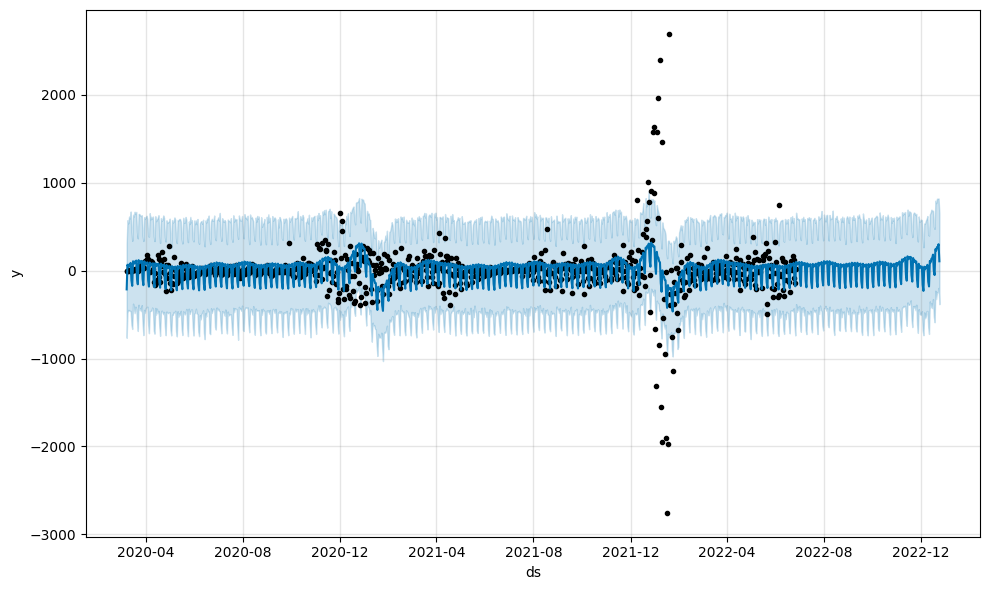

In [157]:
Model.plot(forecast, uncertainty=True)
plt.show()